In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

In [2]:
# Use same random value whenever needed ran=42
ran = 27
kmax=40; kstep=1
trainsize=.8; testsize=.2; #valsize=.1
epsilon=0
# str_stattoplot = 'accuracy'
str_stattoplot = 'recall'

### Using wine dataset

In [3]:
datasets = ['abalone', 'wine']

use_dataset = 1
print("Use dataset ", datasets[use_dataset])

Use dataset  wine


In [6]:
#Loading Data set
if datasets[use_dataset] == 'wine':
    wine_r = pd.read_csv("C:/Users/Geethu/Documents/Canada/UniversityofWaterloo/3. Winter 2023/ECE 657A/Assignments/Assignment 2/winequality-red.csv", sep=';')
   #Loading Data set
    wine_w = pd.read_csv("C:/Users/Geethu/Documents/Canada/UniversityofWaterloo/3. Winter 2023/ECE 657A/Assignments/Assignment 2/winequality-white.csv", sep=';')
    wine_r["colour"]=1
    #Loading Data set
    wine_w["colour"]=0
    D = pd.concat([wine_w,wine_r])

    Xcolnames = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour']
    Ycolname = 'quality'
    # an alternative label 
    # C = 'color'

    # Define subsets of X columns to use for large plots or tables
    Xs1 = ['density',  'residual sugar', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'colour']
    Xs2 = [ 'fixed acidity','pH', 'chlorides', 'alcohol', 'colour']

    # List 3 columns to use as colours ("hue") for pairs plot
    var_for_hue = [Ycolname,'colour', 'pH']

In [7]:
# Any Dataset : Assign the data to variables
X = D[Xcolnames]+epsilon
Y = D[Ycolname]
Dname = datasets[use_dataset]
D.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [8]:
def my_plt_gca(title, xlabel, ylabel):
    ax = plt.gca()
    ax.set_title('(' + datasets[use_dataset] + ') ' + title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

In [9]:
# return a usable text title string for the plotname plot with 
# standard other info about experiemnts and data being run
def getPlotTitle(plotname):
        return '(' + Dname + ') ' + plotname + ' : ' + txt_exper_info_short

In [10]:
def print_title(specific='', general=''):
    display(Markdown('### '+ generate_title(specific, general)))
            
# print_title('Pairs Plots', 'Xs2 features')

In [11]:
def generate_title(specific='', general=''):
    return '(' + Dname + ') ' + specific + ' [' + general + ']'

In [12]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [13]:
# Summary momemt statistics of Data
S = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
S['mean'] = D.mean()
S['median'] = D.median()
S['variance'] = D.var()
S['skew'] = D.skew()
S['kurtosis'] = D.kurtosis()
display(S)

,mean,median,variance,skew,kurtosis
fixed acidity,7.215307,7.00000,1.680740,1.723290,5.061161
volatile acidity,0.339666,0.29000,0.027105,1.495097,2.825372
citric acid,0.318633,0.31000,0.021117,0.471731,2.397239
residual sugar,5.443235,3.00000,22.636696,1.435404,4.359272
chlorides,0.056034,0.04700,0.001227,5.399828,50.898051
free sulfur dioxide,30.525319,29.00000,315.041192,1.220066,7.906238
total sulfur dioxide,115.744574,118.00000,3194.720039,-0.001177,-0.371664
density,0.994697,0.99489,0.000009,0.503602,6.606067
pH,3.218501,3.21000,0.025853,0.386839,0.367657
sulphates,0.531268,0.51000,0.022143,1.797270,8.653699


### Representation Learning - applying PCA and LDA onto Wine dataset

In [14]:
from sklearn.preprocessing import StandardScaler
d = X.values
d = StandardScaler().fit_transform(d) # normalizing the features
d

array([[-0.16608919, -0.42318303,  0.28468605, ..., -0.54617826,
        -1.41855821, -0.57136659],
       [-0.70607349, -0.24094936,  0.14704613, ..., -0.27735097,
        -0.83161516, -0.57136659],
       [ 0.68245757, -0.36243847,  0.55996589, ..., -0.61338508,
        -0.32852111, -0.57136659],
       ...,
       [-0.70607349,  1.03468634, -1.29817304, ...,  1.47002637,
         0.42611996,  1.75018984],
       [-1.01463595,  1.85473786, -1.366993  , ...,  1.20119908,
        -0.2446721 ,  1.75018984],
       [-0.93749534, -0.1802048 ,  1.04170561, ...,  0.86516498,
         0.42611996,  1.75018984]])

In [15]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca_wine = PCA()
principalComponents_wine = pca_wine.fit_transform(d)
lda_wine=LinearDiscriminantAnalysis()
lda_wine_components = lda_wine.fit_transform(d,Y.values)

In [16]:
principal_wine_Df = pd.DataFrame(data = principalComponents_wine
             )
principal_wine_Df=principal_wine_Df.reset_index(drop=True)
lda_wine_Df=pd.DataFrame(data=lda_wine_components)

In [17]:

lda_wine_Df=lda_wine_Df.reset_index(drop=True)
df = pd.DataFrame(data=Y)
df=df.reset_index(drop=True)
principal_wine_Df['q']=df
lda_wine_Df['q']=df

In [18]:
principal_wine_Df

,0,1,2,3,4,5,6,7,8,9,10,11,q
0,-2.185179,3.529983,-0.699542,-1.140516,-0.774150,0.281351,-0.880584,0.682428,0.280179,0.355150,0.100976,0.032490,6
1,-0.247707,-0.553177,-0.311558,-0.034676,0.186693,-1.443224,0.036541,-0.320955,-0.939053,-0.174293,0.064624,0.150410,6
2,-0.380592,0.365447,0.484481,-0.395899,-0.490301,-0.568206,0.510207,0.064641,0.182330,-0.211103,-0.656093,-0.185630,6
3,-1.735882,0.929351,-0.367159,-0.063149,0.275574,-0.062353,0.490695,-0.048464,0.360290,-0.460825,0.237817,-0.051019,6
4,-1.735882,0.929351,-0.367159,-0.063149,0.275574,-0.062353,0.490695,-0.048464,0.360290,-0.460825,0.237817,-0.051019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2.699833,-0.854172,-2.200415,0.284605,0.515830,0.277366,0.320972,0.191019,0.552571,0.639370,0.056505,-0.023749,5
6493,2.524458,-1.161039,-2.180098,1.407559,-0.428128,0.799100,-0.141320,-0.160144,0.440274,0.852950,0.077138,0.160263,6
6494,2.775507,-0.761733,-1.540371,0.975852,-0.166246,0.447772,-0.477668,-0.041212,0.487244,0.720443,0.169967,0.254519,6
6495,2.984356,-0.767021,-2.577359,1.057379,-0.151128,0.200933,0.224682,-0.015043,-0.051581,0.884022,-0.169020,-0.059837,5


In [19]:
lda_wine_Df

,0,1,2,3,4,5,q
0,0.752078,-1.466209,0.024718,-0.371827,1.626055,0.245660,6
1,1.445150,0.392049,1.788109,0.248460,0.098989,0.653843,6
2,-0.123015,0.911451,-0.329427,-0.894688,-0.878564,1.741494,6
3,0.288961,-0.721769,-0.798431,-0.349889,0.223399,0.723765,6
4,0.288961,-0.721769,-0.798431,-0.349889,0.223399,0.723765,6
...,...,...,...,...,...,...,...
6492,0.512278,-0.224430,-0.957392,-0.049654,0.261917,-1.105835,5
6493,-0.514707,-0.597340,-0.414056,-0.228509,0.130035,-1.962774,6
6494,-0.231160,-0.831907,0.372416,-0.419432,0.245689,-2.240703,6
6495,0.630811,0.158871,-0.798440,0.349422,-0.191810,-0.846715,5


Text(0, 0.5, 'PC2')

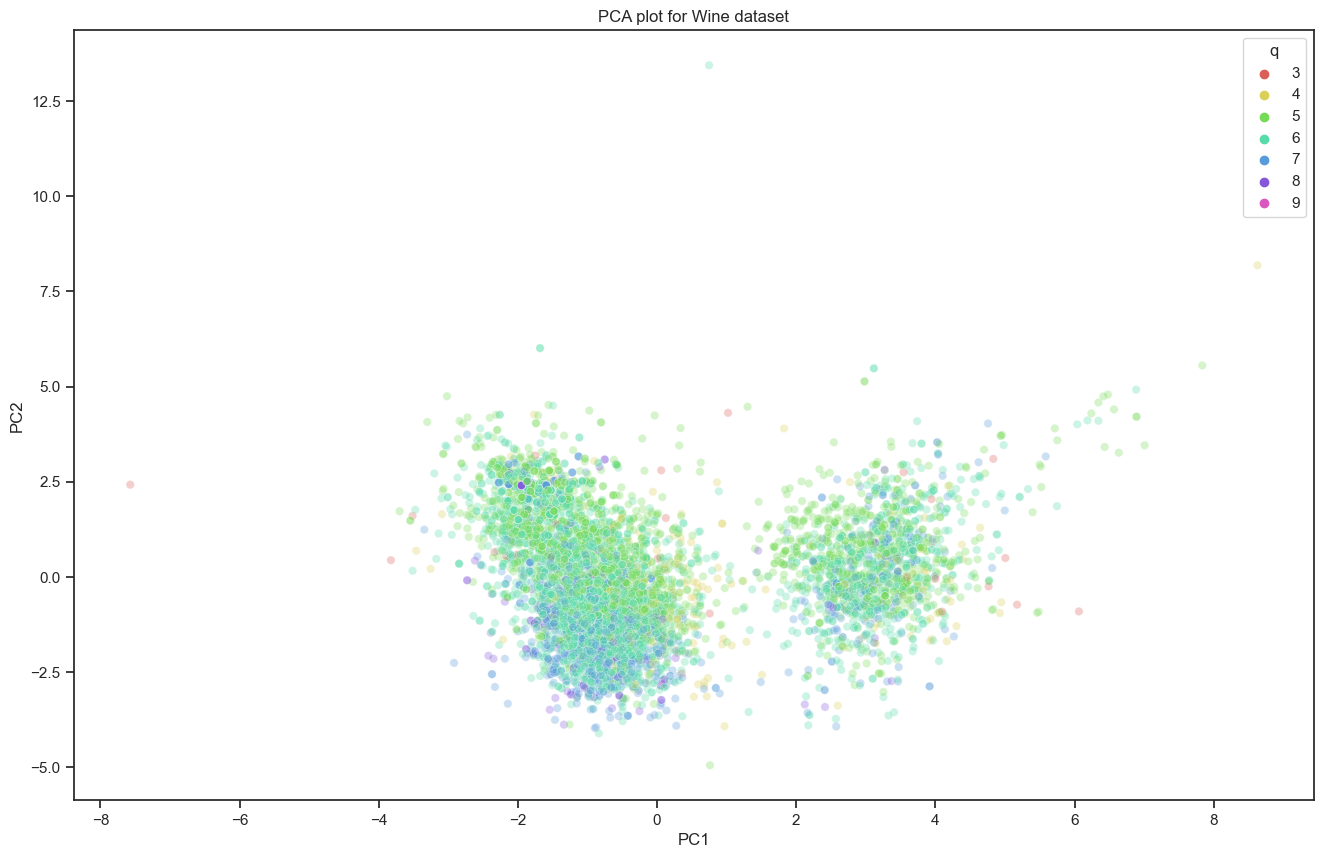

In [20]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=principal_wine_Df.iloc[:,0], y=principal_wine_Df.iloc[:,1],
    hue="q",
    palette=sns.color_palette("hls",len(principal_wine_Df['q'].unique())),
    data=principal_wine_Df,
    legend="full",
    alpha=0.3
).set(title='PCA plot for Wine dataset')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [21]:
print('Explained variation per principal component: {}'.format(pca_wine.explained_variance_ratio_.cumsum()))
print('Explained variation per lda component: {}'.format(lda_wine.explained_variance_ratio_.cumsum()))


Explained variation per principal component: [0.3174498  0.52817876 0.65830372 0.73920691 0.79952468 0.85065306
 0.89535023 0.9372656  0.96663663 0.98803932 0.99798773 1.        ]
Explained variation per lda component: [0.86162143 0.94990868 0.98019606 0.9920103  0.99803137 1.        ]


In [22]:
print('Explained variation per principal component: {}'.format(pca_wine.explained_variance_ratio_))
print('Explained variation per lda component: {}'.format(lda_wine.explained_variance_ratio_))


Explained variation per principal component: [0.3174498  0.21072897 0.13012495 0.08090319 0.06031777 0.05112838
 0.04469717 0.04191537 0.02937103 0.02140269 0.00994841 0.00201227]
Explained variation per lda component: [0.86162143 0.08828725 0.03028738 0.01181424 0.00602107 0.00196863]


Text(0, 0.5, 'Cumulative explained variance ratio')

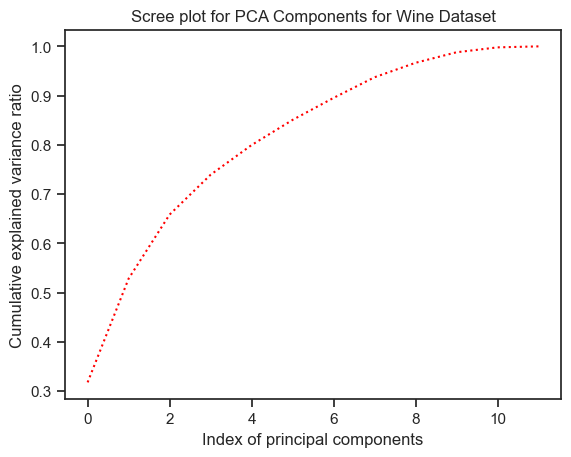

In [23]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = plt.gca()
plt.plot(pca_wine.explained_variance_ratio_.cumsum(), color='red', linestyle='dotted')
ax.set_title("Scree plot for PCA Components for Wine Dataset")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("Cumulative explained variance ratio")

Text(0, 0.5, 'Cumulative explained variance ratio')

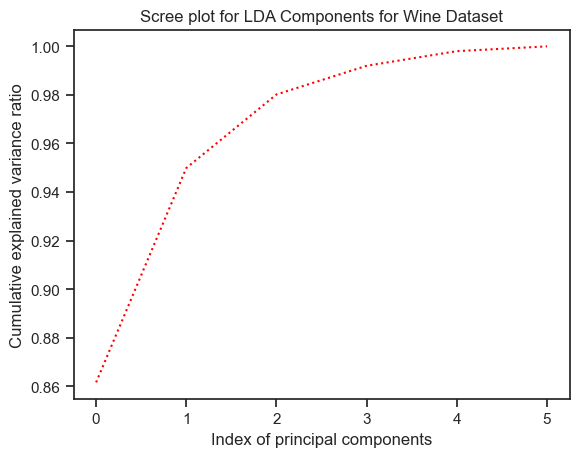

In [24]:
figure = plt.figure()
ax = plt.gca()
plt.plot(lda_wine.explained_variance_ratio_.cumsum(), color='red', linestyle='dotted')
ax.set_title("Scree plot for LDA Components for Wine Dataset")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("Cumulative explained variance ratio")

In [25]:
y_samp=principal_wine_Df['q']
principal_wine_Df=principal_wine_Df.drop(columns=["q"],axis=1)
lda_wine_Df=lda_wine_Df.drop(columns=["q"],axis=1)
y_samp

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: q, Length: 6497, dtype: int64

### Using KNN classifier on PCA features and LDA features on wine dataset

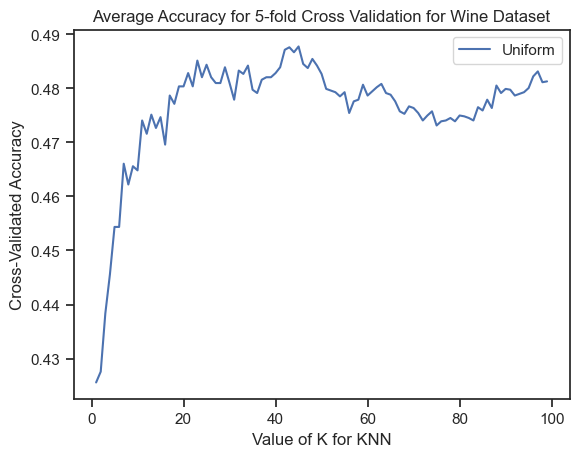

Maximum Accuracy for 5-fold Cross Validation for Wine Dataset is 0.487755 at k Value of 45


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
k_range = range(1, 100)
k_scores_e = []
k_scores = []
k_scores_m = []
k_scores_u = []

for k in k_range:
    knn_u = KNeighborsClassifier(n_neighbors=k)
    scores_u = cross_val_score(knn_u, d, Y, cv=5, scoring='accuracy')
    k_scores_u.append(scores_u.mean())
plt.plot(k_range, k_scores_u,label="Uniform")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.title("Average Accuracy for 5-fold Cross Validation for Wine Dataset")
plt.show()
max_value_u_u = max(k_scores_u)
index_u_u = k_scores_u.index(max_value_u_u)
print("Maximum Accuracy for 5-fold Cross Validation for Wine Dataset is %f at k Value of %d"%(max_value_u_u,index_u_u+1))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(principal_wine_Df, y_samp, test_size=0.2, random_state=12345)
knn = KNeighborsClassifier(n_neighbors=index_u_u+1)
knn.fit(X_train, y_train)
train_preds = knn.predict(X_test)
scores = accuracy_score(y_test,train_preds)
print("Maximum Accuracy on Test Data with an Unbalanced Dataset is %f at k Value of %d"%(scores,index_u_u+1))

Maximum Accuracy on Test Data with an Unbalanced Dataset is 0.554615 at k Value of 45


In [28]:
X_train, X_test, y_train, y_test = train_test_split(principal_wine_Df, y_samp, test_size=0.2, random_state=12345)
knn = KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=index_u_u+1)
knn.fit(X_train, y_train)
train_preds = knn.predict(X_test)
scores = accuracy_score(y_test,train_preds)
print("Maximum Accuracy Using Euclidean Distance Measure on Test Data with an Unbalanced Dataset is %f at k Value of %d"%(scores,index_u_u+1))


Maximum Accuracy Using Euclidean Distance Measure on Test Data with an Unbalanced Dataset is 0.684615 at k Value of 45


In [29]:
X_train, X_test, y_train, y_test = train_test_split(principal_wine_Df, y_samp, test_size=0.2, random_state=12345)
knn = KNeighborsClassifier(metric='manhattan',weights='distance',n_neighbors=index_u_u+1)
knn.fit(X_train, y_train)
train_preds = knn.predict(X_test)
scores = accuracy_score(y_test,train_preds)
print("Maximum Accuracy Using Manhattan Distance Measure on Test Data with an Unbalanced Dataset is %f at k Value of %d"%(scores,index_u_u+1))


Maximum Accuracy Using Manhattan Distance Measure on Test Data with an Unbalanced Dataset is 0.681538 at k Value of 45


1 0.5438461538461539
2 0.6192307692307693
3 0.64
4 0.6469230769230769
5 0.6546153846153846
6 0.6646153846153846
7 0.6576923076923077
8 0.6630769230769231
9 0.6692307692307692
10 0.6753846153846154
11 0.6746153846153846
12 0.6776923076923077
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Text(0, 0.5, 'KNN Accuracy')

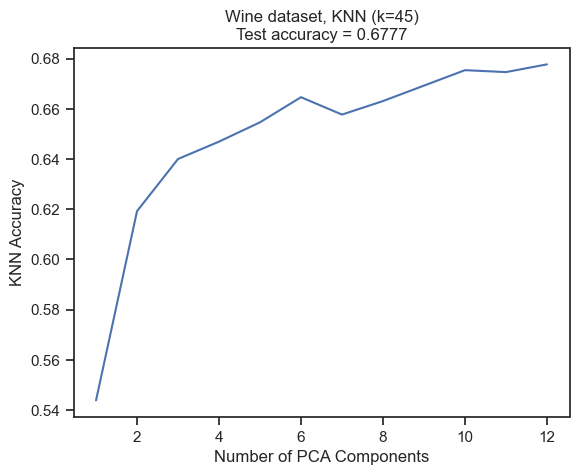

In [30]:
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

n_neighbors = 45
random_state = 0
scores=[]
ivals=[]
knn = KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=n_neighbors)

numcls=principal_wine_Df.columns
for i in range(1,len(numcls)+1):
    X_train, X_test, y_train, y_test = train_test_split(
    principal_wine_Df.iloc[:,:i], y_samp, test_size=0.2, stratify=y_samp, random_state=random_state)
    knn.fit(X_train, y_train)
    acc_knn = knn.score(X_test, y_test)
    scores.append(acc_knn)
    print(i,acc_knn)
    ivals.append(i)
print(ivals)
plt.figure()    
plt.plot(ivals,scores)
plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.4f}".format("Wine dataset", n_neighbors, acc_knn))
plt.xlabel("Number of PCA Components")
plt.ylabel("KNN Accuracy")

1 0.6253846153846154
2 0.6523076923076923
3 0.6607692307692308


4 0.6730769230769231
5 0.6653846153846154
6 0.6684615384615384
[1, 2, 3, 4, 5, 6]


Text(0, 0.5, 'KNN Accuracy')

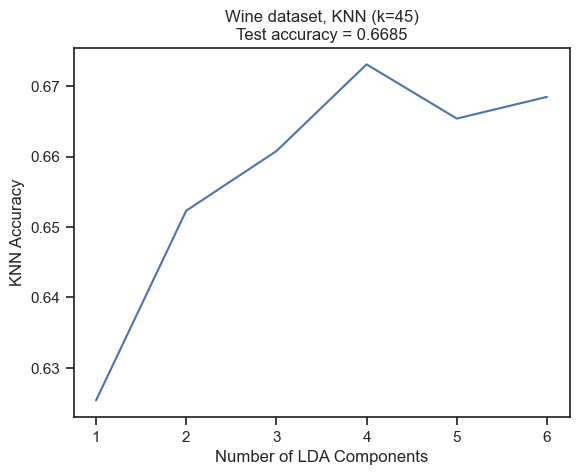

In [31]:
knn = KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=n_neighbors)

n_neighbors = 45
random_state = 0
scores=[]
ivals=[]
numcls=lda_wine_Df.columns
for i in range(1,len(numcls)+1):
    X_train, X_test, y_train, y_test = train_test_split(
    lda_wine_Df.iloc[:,:i], y_samp, test_size=0.2, stratify=y_samp, random_state=random_state)
    knn.fit(X_train, y_train)
    acc_knn = knn.score(X_test, y_test)
    scores.append(acc_knn)
    print(i,acc_knn)
    ivals.append(i)
print(ivals)
plt.figure()    
plt.plot(ivals,scores)
plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.4f}".format("Wine dataset", n_neighbors, acc_knn))
plt.xlabel("Number of LDA Components")
plt.ylabel("KNN Accuracy")

### t-SNE method on wine dataset

In [32]:
from __future__ import print_function
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(d)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.008s...
[t-SNE] Computed neighbors for 6497 samples in 0.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.735205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.695961
[t-SNE] KL divergence after 300 iterations: 2.355831
t-SNE done! Time elapsed: 7.490667343139648 seconds


[Text(0.5, 1.0, 'T-sne plot for Wine Dataset')]

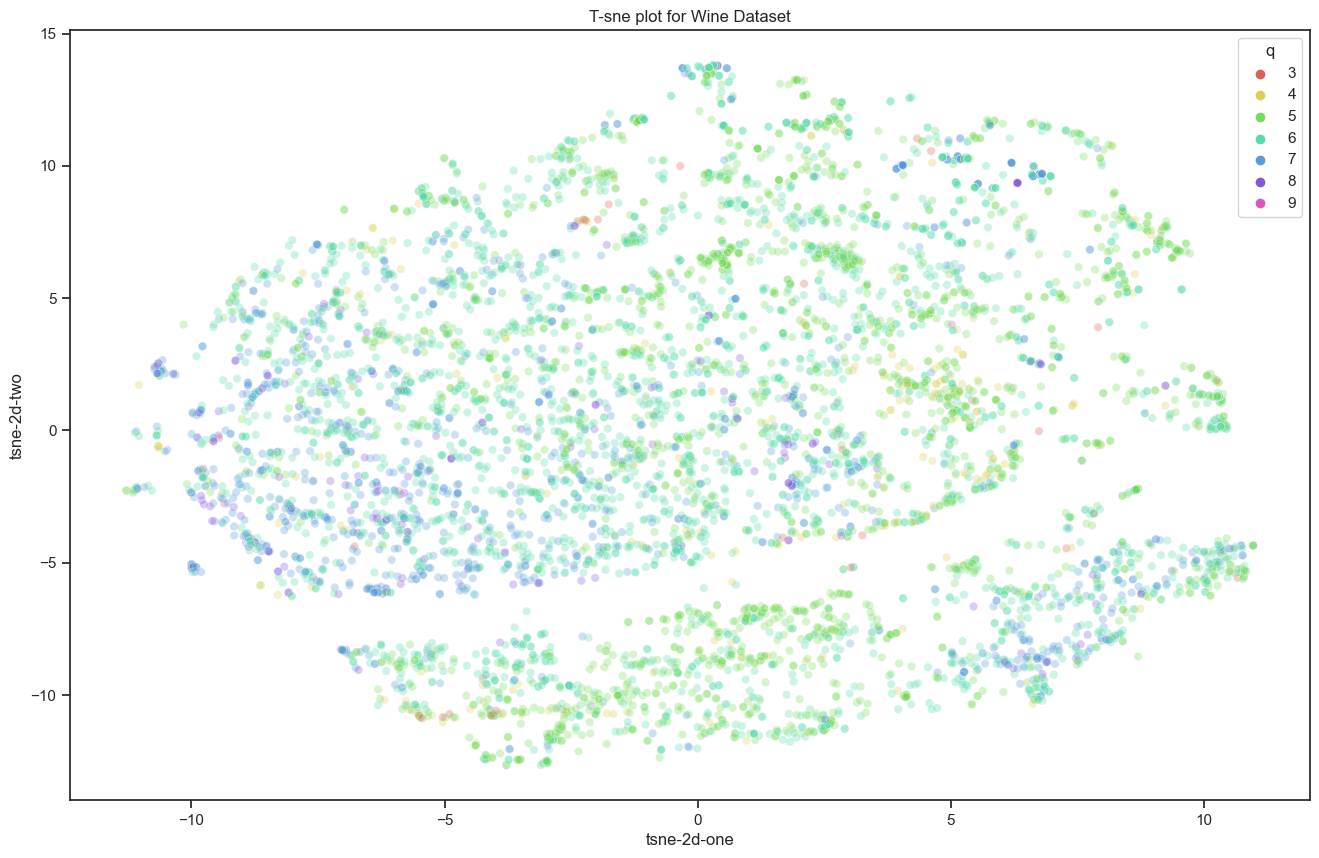

In [33]:
df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df = pd.DataFrame(data=Y)
df=df.reset_index(drop=True)
df_subset['q']=df
#df_subset['q']=Y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="q",
    palette=sns.color_palette("hls", len(df_subset['q'].unique())),
    data=df_subset,
    legend="full",
    alpha=0.3
).set(title='T-sne plot for Wine Dataset')

### Using Abalone dataset

In [34]:
use_dataset = 0
print("Use dataset ", datasets[use_dataset])

Use dataset  abalone


### Data Preprocessing

In [35]:
if datasets[use_dataset] == 'abalone':
    Xcategorycolnames = ['Sex']
    Xcolnames = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']  
    Ycolname = 'Rings'
    #DS = pd.read_csv("C:\\Users\\Geethu\\Documents\\Canada\\University of Waterloo\\Winter 2023\\ECE 657A\\Assignments\\Assignment 2\\abalone.csv", sep=',')
    DS = pd.read_csv("C:/Users/Geethu/Documents/Canada/UniversityofWaterloo/3. Winter 2023/ECE 657A/Assignments/Assignment 2/abalone.csv", sep=',')
    DS.columns=Xcategorycolnames + Xcolnames+[Ycolname]
    
    # For now remove 'Sex' column
    D = DS.drop(columns=['Sex'])
    print(D.columns)
    
    
    # Define subsets of X columns to use for large plots or tables
    Xs1 = Xcolnames
    Xs2 = ['Length',  'Height', 'Shucked weight',  'Shell weight']
    
    # List 3 columns to use as colours ("hue") for pairs plot
    var_for_hue = [Ycolname,'Length', 'Height']

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [36]:
# Any Dataset : Assign the data to variables
X_ab = D[Xcolnames]+epsilon
Y_ab = D[Ycolname]
Dname = datasets[use_dataset]
D.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [37]:
S_ab = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
S_ab['mean'] = D.mean()
S_ab['median'] = D.median()
S_ab['variance'] = D.var()
S_ab['skew'] = D.skew()
S_ab['kurtosis'] = D.kurtosis()
display(S_ab)

,mean,median,variance,skew,kurtosis
Length,0.524009,0.54500,0.014425,-0.640240,0.064698
Diameter,0.407892,0.42500,0.009850,-0.609457,-0.045675
Height,0.139527,0.14000,0.001749,3.129241,76.046000
Whole weight,0.828818,0.79975,0.240515,0.530576,-0.024136
Shucked weight,0.359400,0.33600,0.049275,0.718724,0.594448
Viscera weight,0.180613,0.17100,0.012017,0.591463,0.083574
Shell weight,0.238852,0.23400,0.019380,0.620547,0.531350
Rings,9.932471,9.00000,10.391606,1.115157,2.335940


In [38]:
def zscore_calc(df):
    df_copy = df.copy()
    for column in df_copy.columns:
        df_copy[column] = (df_copy[column] - df_copy[column].mean())/ df_copy[column].std()
        
    return df_copy

In [39]:
d_ab = X_ab.values
d_ab = StandardScaler().fit_transform(d_ab) # normalizing the features
d_ab

array([[-1.44900723, -1.43989229, -1.18425209, ..., -1.17096695,
        -1.20532696, -1.21305408],
       [ 0.0498915 ,  0.12201495, -0.10824748, ..., -0.46361041,
        -0.35684354, -0.20727719],
       [-0.69955786, -0.4322102 , -0.34735962, ..., -0.64833409,
        -0.60773918, -0.60240383],
       ...,
       [ 0.63279657,  0.67624011,  1.56553747, ...,  0.74835715,
         0.97518418,  0.49676663],
       [ 0.84097695,  0.77700832,  0.25042072, ...,  0.77313716,
         0.73341202,  0.41055718],
       [ 1.54879024,  1.48238578,  1.32642533, ...,  2.64064851,
         1.78717368,  1.84019719]])

### Representation Learning - applying PCA and LDA onto Abalone dataset

In [40]:
pca_ab = PCA()
principalComponents_ab = pca_ab.fit_transform(d_ab)
lda_ab=LinearDiscriminantAnalysis()
lda_ab_components = lda_ab.fit_transform(d_ab,Y_ab.values)

In [41]:
principal_ab_Df = pd.DataFrame(data = principalComponents_ab
             )
principal_ab_Df=principal_ab_Df.reset_index(drop=True)
lda_ab_Df=pd.DataFrame(data=lda_ab_components)
lda_ab_Df=lda_ab_Df.reset_index(drop=True)
df = pd.DataFrame(data=Y_ab)
df=df.reset_index(drop=True)
principal_ab_Df['q']=df
lda_ab_Df['q']=df

Text(0, 0.5, 'PC2')

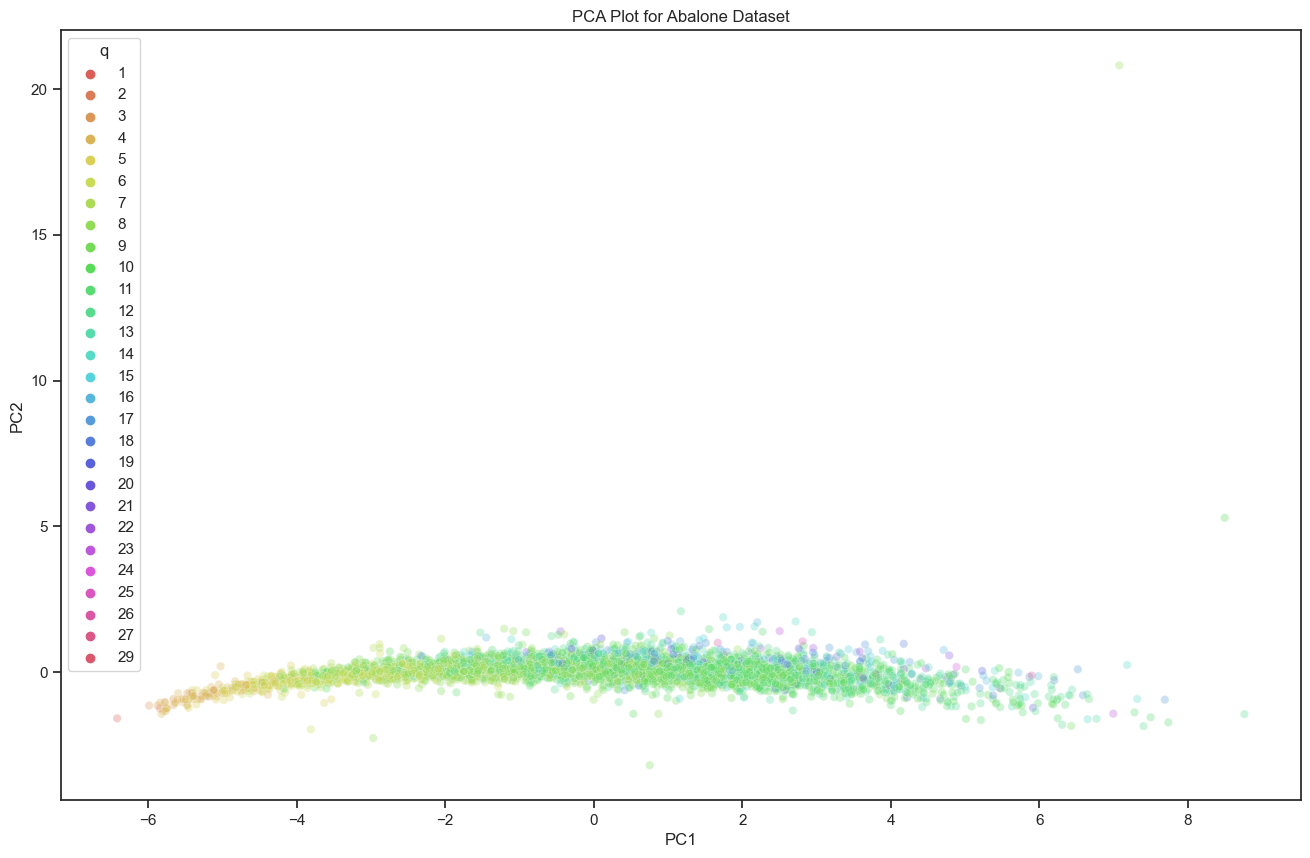

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=principal_ab_Df.iloc[:,0], y=principal_ab_Df.iloc[:,1],
    hue="q",
    palette=sns.color_palette("hls",len(principal_ab_Df['q'].unique())),
    data=principal_ab_Df,
    legend="full",
    alpha=0.3
).set(title='PCA Plot for Abalone Dataset')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'Cumulative explained varaince ratio')

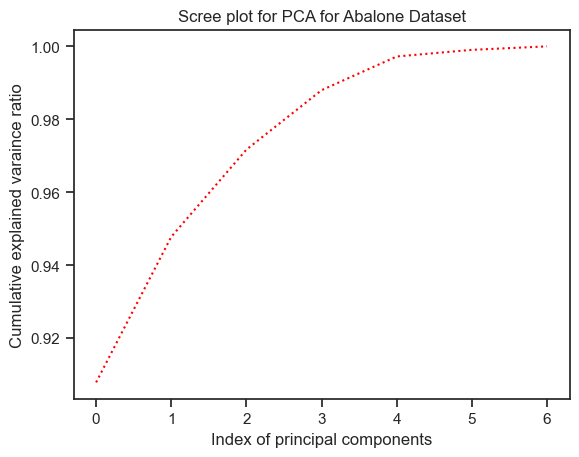

In [43]:
figure = plt.figure()
ax = plt.gca()
plt.plot(pca_ab.explained_variance_ratio_.cumsum(), color='red', linestyle='dotted')
ax.set_title("Scree plot for PCA for Abalone Dataset")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("Cumulative explained varaince ratio")

Text(0, 0.5, 'Cumulative explained varaince ratio')

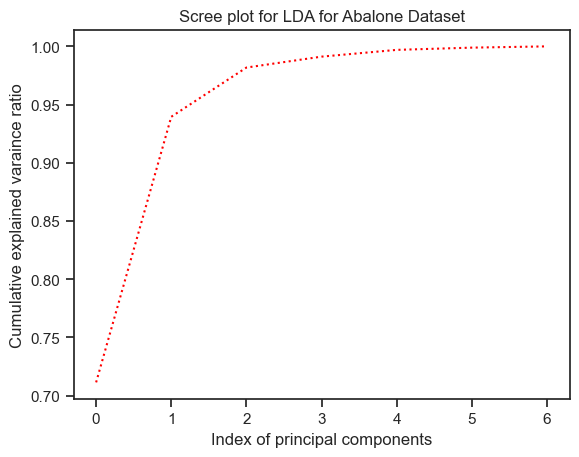

In [44]:
figure = plt.figure()
ax = plt.gca()
plt.plot(lda_ab.explained_variance_ratio_.cumsum(), color='red', linestyle='dotted')
ax.set_title("Scree plot for LDA for Abalone Dataset")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("Cumulative explained varaince ratio")

In [45]:
print('Explained variation per principal component: {}'.format(pca_ab.explained_variance_ratio_.cumsum()))
print('Explained variation per lda component: {}'.format(lda_ab.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.90786859 0.94779141 0.97169626 0.98799371 0.99723088 0.99904891
 1.        ]
Explained variation per lda component: [0.71145484 0.93955331 0.98181615 0.99118534 0.99699181 0.99891886
 1.        ]


In [46]:
print('Explained variation per principal component: {}'.format(pca_ab.explained_variance_ratio_))
print('Explained variation per lda component: {}'.format(lda_ab.explained_variance_ratio_))

Explained variation per principal component: [0.90786859 0.03992282 0.02390485 0.01629745 0.00923717 0.00181803
 0.00095109]
Explained variation per lda component: [0.71145484 0.22809847 0.04226284 0.00936919 0.00580647 0.00192704
 0.00108114]


In [47]:
y_samp=principal_ab_Df['q']
principal_ab_Df=principal_ab_Df.drop(columns=["q"],axis=1)
lda_ab_Df=lda_ab_Df.drop(columns=["q"],axis=1)
y_samp

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: q, Length: 4176, dtype: int64

In [48]:
d_ab

array([[-1.44900723, -1.43989229, -1.18425209, ..., -1.17096695,
        -1.20532696, -1.21305408],
       [ 0.0498915 ,  0.12201495, -0.10824748, ..., -0.46361041,
        -0.35684354, -0.20727719],
       [-0.69955786, -0.4322102 , -0.34735962, ..., -0.64833409,
        -0.60773918, -0.60240383],
       ...,
       [ 0.63279657,  0.67624011,  1.56553747, ...,  0.74835715,
         0.97518418,  0.49676663],
       [ 0.84097695,  0.77700832,  0.25042072, ...,  0.77313716,
         0.73341202,  0.41055718],
       [ 1.54879024,  1.48238578,  1.32642533, ...,  2.64064851,
         1.78717368,  1.84019719]])

In [49]:
principal_ab_Df

,0,1,2,3,4,5,6
0,-3.362938,-0.105367,0.252075,-0.012209,0.019849,0.006634,0.002658
1,-0.482729,0.252016,-0.443914,-0.103746,-0.041775,0.045104,-0.045176
2,-1.509360,0.207481,-0.000576,0.004878,-0.018838,0.186482,0.001665
3,-3.654195,-0.273040,0.274809,-0.009368,0.038677,0.057018,-0.026248
4,-2.538528,-0.167888,-0.054933,-0.116707,-0.023791,-0.188491,0.008877
...,...,...,...,...,...,...,...
4171,0.800900,0.385346,-0.064834,0.166626,-0.379710,0.068326,0.047355
4172,0.718834,-0.329181,-0.293190,0.111005,-0.023489,-0.145317,-0.001554
4173,2.166840,0.723898,0.402573,0.378785,-0.201885,0.039515,0.025099
4174,1.646964,-0.305173,-0.306135,0.239227,-0.071542,-0.025360,0.095442


### Using KNN classifier on PCA features and LDA features on Abalone dataset

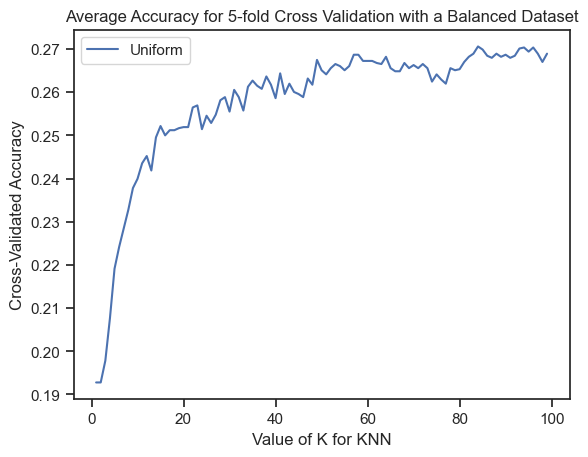

Maximum Accuracy for 5-fold Cross Validation with a Balanced Dataset is 0.270604 at k Value of 84


In [50]:
%matplotlib inline
k_range = range(1, 100)
k_scores_e = []
k_scores = []
k_scores_m = []
k_scores_u = []

for k in k_range:
    knn_u = KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=k)
    scores_u = cross_val_score(knn_u, d_ab, Y_ab, cv=5, scoring='accuracy')
    k_scores_u.append(scores_u.mean())
plt.plot(k_range, k_scores_u,label="Uniform")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.title("Average Accuracy for 5-fold Cross Validation with a Balanced Dataset")
plt.show()
max_value_u_u = max(k_scores_u)
index_u_u = k_scores_u.index(max_value_u_u)
print("Maximum Accuracy for 5-fold Cross Validation with a Balanced Dataset is %f at k Value of %d"%(max_value_u_u,index_u_u+1))

Text(0, 0.5, 'KNN Accuracy')

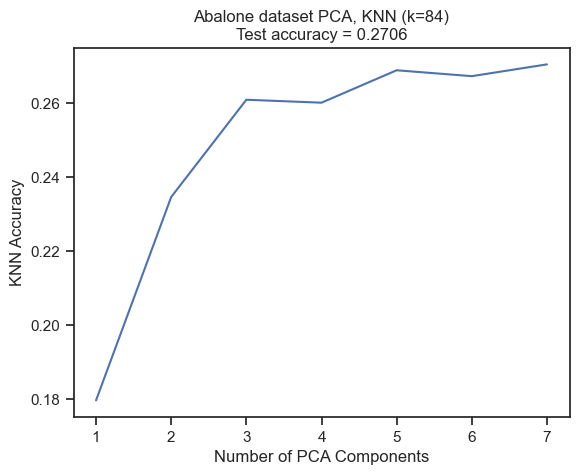

In [51]:
n_neighbors = 84
random_state = 0
scores=[]
ivals=[]
knn = KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=n_neighbors)

numcls=principal_ab_Df.columns
for i in range(1,len(numcls)+1):
    X_train, X_test, y_train, y_test = train_test_split(
    principal_ab_Df.iloc[:,:i], y_samp, test_size=0.3, random_state=random_state)
    knn.fit(X_train, y_train)
    acc_knn = knn.score(X_test, y_test)
    scores.append(acc_knn)
    ivals.append(i)
plt.figure()    
plt.plot(ivals,scores)
plt.title(
        "{} PCA, KNN (k={})\nTest accuracy = {:.4f}".format("Abalone dataset", n_neighbors, acc_knn))
plt.xlabel("Number of PCA Components")
plt.ylabel("KNN Accuracy")

Text(0, 0.5, 'KNN Accuracy')

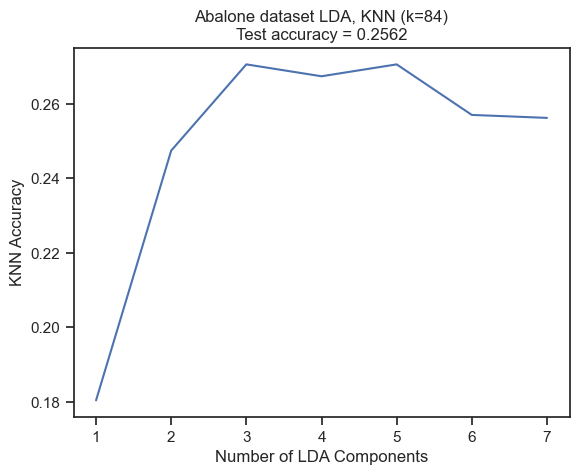

In [52]:
n_neighbors = 84
random_state = 0
scores=[]
ivals=[]
knn = KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=n_neighbors)

numcls=lda_ab_Df.columns
for i in range(1,len(numcls)+1):
    X_train, X_test, y_train, y_test = train_test_split(
    lda_ab_Df.iloc[:,:i], y_samp, test_size=0.3, random_state=random_state)
    knn.fit(X_train, y_train)
    acc_knn = knn.score(X_test, y_test)
    scores.append(acc_knn)
    ivals.append(i)
plt.figure()    
plt.plot(ivals,scores)
plt.title(
        "{} LDA, KNN (k={})\nTest accuracy = {:.4f}".format("Abalone dataset", n_neighbors, acc_knn))
plt.xlabel("Number of LDA Components")
plt.ylabel("KNN Accuracy")

### t-SNE method on Abalone dataset

In [53]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(d_ab)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4176 samples in 0.003s...
[t-SNE] Computed neighbors for 4176 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4176
[t-SNE] Computed conditional probabilities for sample 2000 / 4176
[t-SNE] Computed conditional probabilities for sample 3000 / 4176
[t-SNE] Computed conditional probabilities for sample 4000 / 4176
[t-SNE] Computed conditional probabilities for sample 4176 / 4176
[t-SNE] Mean sigma: 0.195074
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.814278
[t-SNE] KL divergence after 300 iterations: 1.683954
t-SNE done! Time elapsed: 3.7263424396514893 seconds


[Text(0.5, 1.0, 'T-sne plot for Abalone Dataset')]

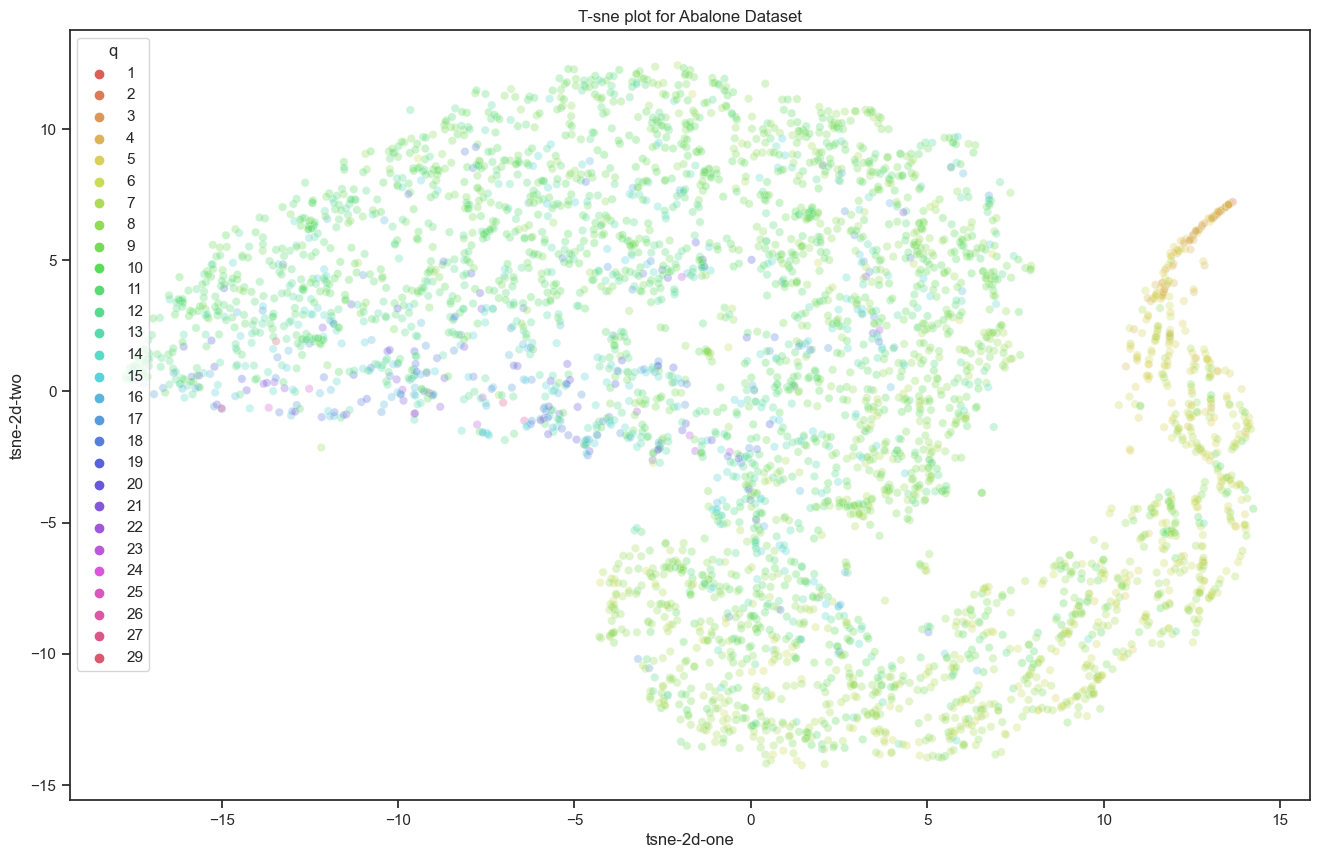

In [54]:
df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df = pd.DataFrame(data=Y_ab)
df=df.reset_index(drop=True)
df_subset['q']=df
#df_subset['q']=Y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="q",
    palette=sns.color_palette("hls", len(df_subset['q'].unique())),
    data=df_subset,
    legend="full",
    alpha=0.3
).set(title='T-sne plot for Abalone Dataset')

## Naive Bayes Classifier

In [55]:
##Naive Bayes

def cross_val_nb(model, x, y, dataset):
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x) 

    if model == "Multinomial":
        nb_model = MultinomialNB()
    elif model == "Complement":
        nb_model = ComplementNB()
    elif model == "Gaussian":
        nb_model = GaussianNB()
    
    scores = cross_val_score(nb_model, x, y, cv=5, scoring='accuracy')
    return np.mean(scores)
    

##Multinomial Naive Bayes
#Abalone
score_abalone_mnb = cross_val_nb("Multinomial", X_ab, Y_ab, "Abalone")
#Abalone PCA
score_abalone_pca_mnb = cross_val_nb("Multinomial", principal_ab_Df, Y_ab, "Abalone PCA")
#Abalone LDA
score_abalone_lda_mnb = cross_val_nb("Multinomial", lda_ab_Df, Y_ab, "Abalone LDA")
#Wine
score_wine_mnb = cross_val_nb("Multinomial", X, Y, "Wine")
#Wine PCA
score_wine_pca_mnb = cross_val_nb("Multinomial", principal_wine_Df, Y, "Wine PCA")
#Wine LDA
score_wine_lda_mnb = cross_val_nb("Multinomial", lda_wine_Df, Y, "Wine LDA")

##Complement Naive Bayes
#Abalone
score_abalone_cnb = cross_val_nb("Complement", X_ab, Y_ab, "Abalone")
#Abalone PCA
score_abalone_pca_cnb = cross_val_nb("Complement", principal_ab_Df, Y_ab, "Abalone PCA")
#Abalone LDA
score_abalone_lda_cnb = cross_val_nb("Complement", lda_ab_Df, Y_ab, "Abalone LDA")
#Wine
score_wine_cnb = cross_val_nb("Complement", X, Y, "Wine")
#Wine PCA
score_wine_pca_cnb = cross_val_nb("Complement", principal_wine_Df, Y, "Wine PCA")
#Wine LDA
score_wine_lda_cnb = cross_val_nb("Complement", lda_wine_Df, Y, "Wine LDA")

##Gaussian Naive Bayes
#Abalone
score_abalone_gnb = cross_val_nb("Gaussian", X_ab, Y_ab, "Abalone")
#Abalone PCA
score_abalone_pca_gnb = cross_val_nb("Gaussian", principal_ab_Df, Y_ab, "Abalone PCA")
#Abalone LDA
score_abalone_lda_gnb = cross_val_nb("Gaussian", lda_ab_Df, Y_ab, "Abalone LDA")
#Wine
score_wine_gnb = cross_val_nb("Gaussian", X, Y, "Wine")
#Wine PCA
score_wine_pca_gnb = cross_val_nb("Gaussian", principal_wine_Df, Y, "Wine PCA")
#Wine LDA
score_wine_lda_gnb = cross_val_nb("Gaussian", lda_wine_Df, Y, "Wine LDA")

data = {'Naive Bayes Variant': ['Multinomial Navie Bayes', 'Multinomial Navie Bayes', 'Multinomial Navie Bayes', 'Multinomial Navie Bayes', 'Multinomial Navie Bayes', 'Multinomial Navie Bayes', 'Complement Navie Bayes', 'Complement Navie Bayes', 'Complement Navie Bayes', 'Complement Navie Bayes', 'Complement Navie Bayes', 'Complement Navie Bayes', 'Gaussian Navie Bayes', 'Gaussian Navie Bayes', 'Gaussian Navie Bayes', 'Gaussian Navie Bayes', 'Gaussian Navie Bayes', 'Gaussian Navie Bayes'],
       'Dataset':['Abalone', 'Abalone_PCA', 'Abalone_LDA', 'Wine', 'Wine_PCA','Wine_LDA', 'Abalone', 'Abalone_PCA', 'Abalone_LDA','Wine', 'Wine_PCA','Wine_LDA', 'Abalone', 'Abalone_PCA', 'Abalone_LDA', 'Wine', 'Wine_PCA','Wine_LDA'],
       'Accuracy Score': [score_abalone_mnb, score_abalone_pca_mnb, score_abalone_lda_mnb, score_wine_mnb, score_wine_pca_mnb, score_wine_lda_mnb, score_abalone_cnb, score_abalone_pca_cnb, score_abalone_lda_cnb, score_wine_cnb, score_wine_pca_cnb, score_wine_lda_cnb, score_abalone_gnb, score_abalone_pca_gnb, score_abalone_lda_gnb, score_wine_gnb, score_wine_pca_gnb, score_wine_lda_gnb]}

df = pd.DataFrame(data)

display(df)

,Naive Bayes Variant,Dataset,Accuracy Score
0,Multinomial Navie Bayes,Abalone,0.164991
1,Multinomial Navie Bayes,Abalone_PCA,0.164991
2,Multinomial Navie Bayes,Abalone_LDA,0.164991
3,Multinomial Navie Bayes,Wine,0.414954
4,Multinomial Navie Bayes,Wine_PCA,0.436509
5,Multinomial Navie Bayes,Wine_LDA,0.436509
6,Complement Navie Bayes,Abalone,0.175289
7,Complement Navie Bayes,Abalone_PCA,0.199477
8,Complement Navie Bayes,Abalone_LDA,0.250249
9,Complement Navie Bayes,Wine,0.389711


### Decision Tree

#### Abalone Dataset

Best grid search hyperparameters this dataset are:  {'max_depth': 4}  at accuracy  0.2605466578804114


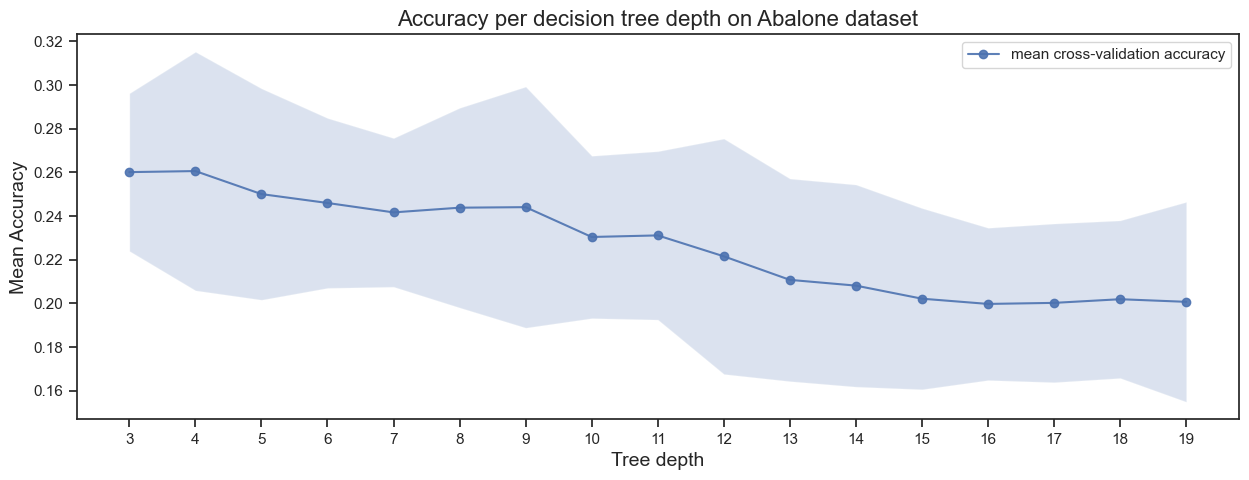

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree

def run_cross_validation_on_trees2(X, y, tree_depths, cv=5, scoring='accuracy'):
    parameters = {'max_depth':range(3,20)}
    clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
    clf.fit(X=X, y=y)
    cv_scores_mean=np.array(clf.cv_results_['mean_test_score'])
    cv_scores_std=np.array(clf.cv_results_['std_test_score'])
    print("Best grid search hyperparameters this dataset are: ", clf.best_params_," at accuracy ",max(clf.cv_results_['mean_test_score']))
    return cv_scores_mean, cv_scores_std, clf.cv_results_


    
def plot_cross_validation_on_trees2(depths, cv_scores_mean, cv_scores_std, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    #ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Mean Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
decision_tree_accuracy=[]
# fitting trees of depth 1 to 24
sm_tree_depths = range(3,20)
#sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_ab, Y_ab, sm_tree_depths)
sm_cv_scores_mean, sm_cv_scores_std,res = run_cross_validation_on_trees2(X_ab, Y_ab, sm_tree_depths)

# plotting accuracy
#plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 'Accuracy per decision tree depth on training data')

plot_cross_validation_on_trees2(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, 'Accuracy per decision tree depth on Abalone dataset')



In [57]:
res

{'mean_fit_time': array([0.00783525, 0.00941224, 0.01085773, 0.01203408, 0.01339626,
        0.01521807, 0.0162612 , 0.01881142, 0.01966405, 0.02157826,
        0.02180037, 0.02412372, 0.02468076, 0.02502174, 0.02621045,
        0.02668624, 0.02608361]),
 'std_fit_time': array([0.00087695, 0.00091077, 0.00065399, 0.00064329, 0.00084398,
        0.00093578, 0.0008374 , 0.00108278, 0.00083566, 0.00115016,
        0.00119064, 0.00177939, 0.00140857, 0.00107054, 0.00140276,
        0.00103906, 0.00125214]),
 'mean_score_time': array([0.00165925, 0.00150743, 0.00187888, 0.00189333, 0.001332  ,
        0.00175824, 0.00170579, 0.00140285, 0.00121808, 0.00251164,
        0.00180116, 0.00187173, 0.00161285, 0.00211878, 0.00159931,
        0.00180902, 0.00135555]),
 'std_score_time': array([0.00055129, 0.00045149, 0.0004664 , 0.00019288, 0.00052331,
        0.00038965, 0.00060296, 0.0004932 , 0.0004232 , 0.0003159 ,
        0.00040062, 0.00045288, 0.00050094, 0.00020233, 0.00048989,
        0.00

#### Wine Dataset

Best grid search hyperparameters this dataset are:  {'max_depth': 4}  at accuracy  0.5108549772013975


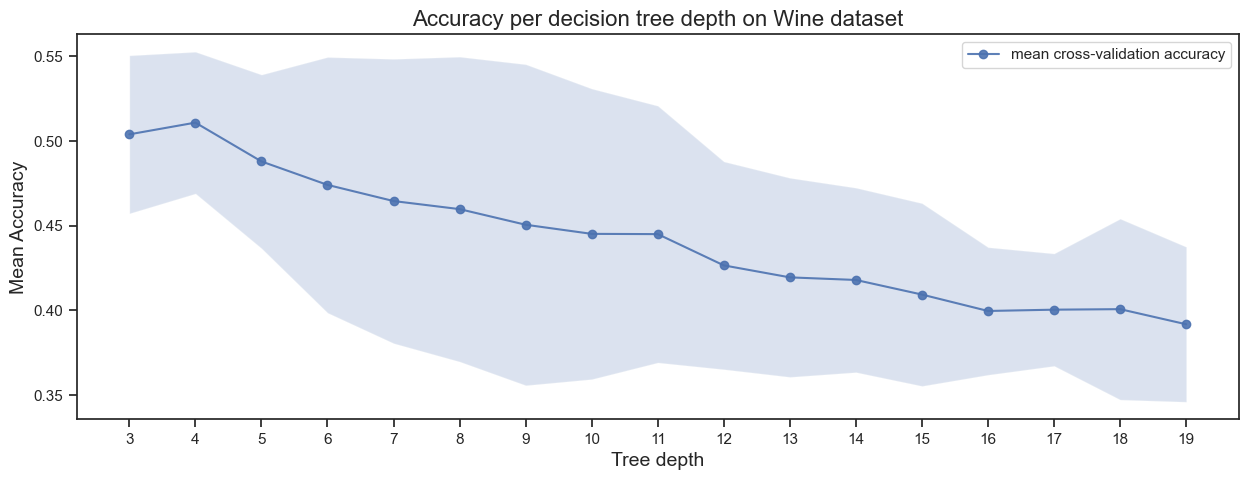

In [58]:
sm_cv_scores_mean, sm_cv_scores_std,res2 = run_cross_validation_on_trees2(X, Y, sm_tree_depths)

# plotting accuracy
#plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 'Accuracy per decision tree depth on training data')

plot_cross_validation_on_trees2(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, 'Accuracy per decision tree depth on Wine dataset')

#### Abalone PCA Dataset

In [59]:
df = pd.DataFrame(data=Y_ab)
df=df.reset_index(drop=True)
principal_ab_Df['q']=df
lda_ab_Df['q']=df

In [60]:
y_samp=principal_ab_Df['q']
principal_ab_Df=principal_ab_Df.drop(columns=["q"],axis=1)
lda_ab_Df=lda_ab_Df.drop(columns=["q"],axis=1)

Best grid search hyperparameters this dataset are:  {'max_depth': 5}  at accuracy  0.2574363235251984


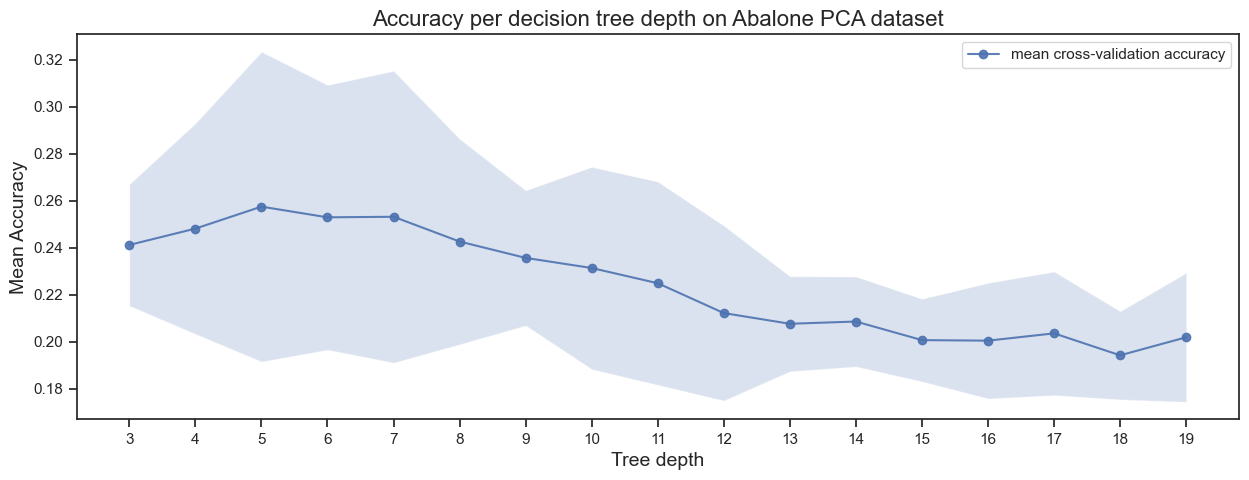

In [61]:
sm_cv_scores_mean, sm_cv_scores_std,res4 = run_cross_validation_on_trees2(principal_ab_Df, Y_ab, sm_tree_depths)
plot_cross_validation_on_trees2(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, 'Accuracy per decision tree depth on Abalone PCA dataset')

#### Abalone LDA Dataset

Best grid search hyperparameters this dataset are:  {'max_depth': 4}  at accuracy  0.2593447554651463


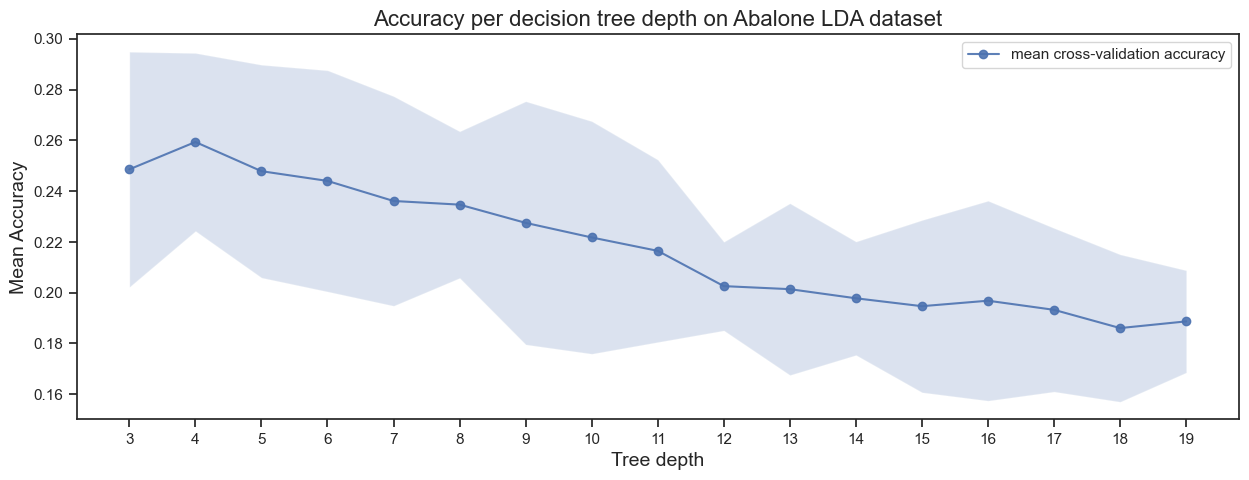

In [62]:
sm_cv_scores_mean, sm_cv_scores_std,res5 = run_cross_validation_on_trees2(lda_ab_Df, Y_ab, sm_tree_depths)
plot_cross_validation_on_trees2(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, 'Accuracy per decision tree depth on Abalone LDA dataset')

In [63]:
y_samp

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: q, Length: 4176, dtype: int64

#### Wine PCA Dataset

Best grid search hyperparameters this dataset are:  {'max_depth': 7}  at accuracy  0.4646773257535382


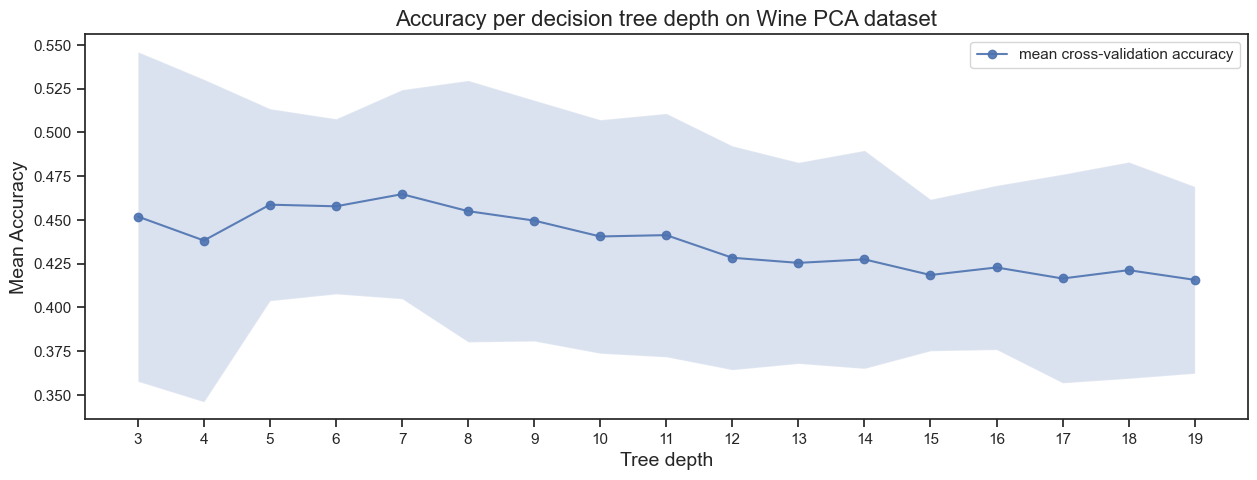

In [64]:
sm_cv_scores_mean, sm_cv_scores_std,res6 = run_cross_validation_on_trees2(principal_wine_Df,Y, sm_tree_depths)
plot_cross_validation_on_trees2(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, 'Accuracy per decision tree depth on Wine PCA dataset')

#### Wine LDA Dataset

Best grid search hyperparameters this dataset are:  {'max_depth': 4}  at accuracy  0.5334865873156867


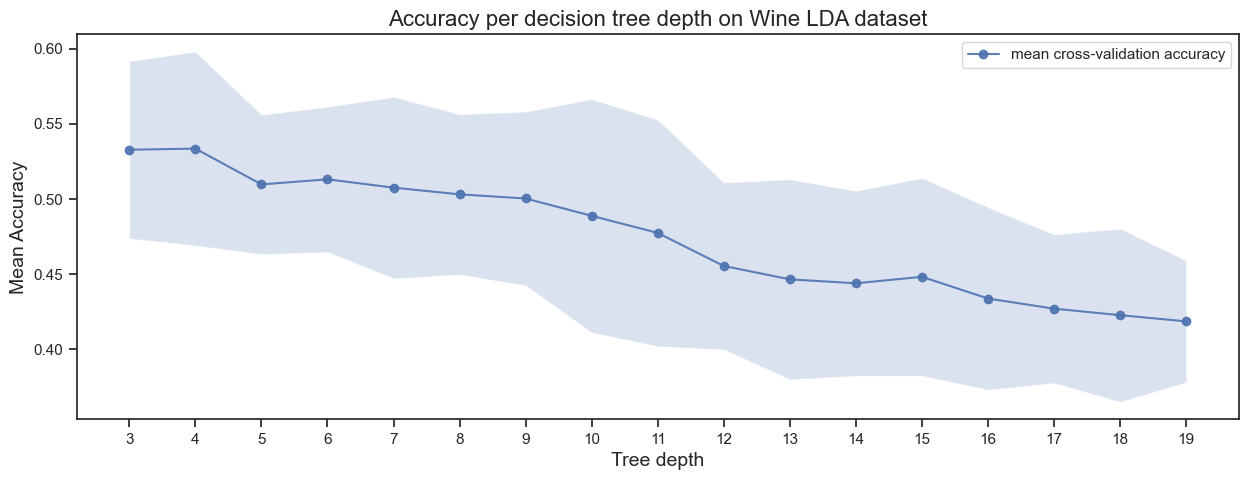

In [65]:
sm_cv_scores_mean, sm_cv_scores_std,res7 = run_cross_validation_on_trees2(lda_wine_Df, Y, sm_tree_depths)
plot_cross_validation_on_trees2(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, 'Accuracy per decision tree depth on Wine LDA dataset')

In [66]:
clf_dt = DecisionTreeClassifier(max_depth=2)
model = clf_dt.fit(X_ab, Y_ab)
tree_wine = tree.export_text(clf_dt)
print(tree_wine)

|--- feature_6 <= 0.14
|   |--- feature_1 <= 0.22
|   |   |--- class: 5
|   |--- feature_1 >  0.22
|   |   |--- class: 7
|--- feature_6 >  0.14
|   |--- feature_6 <= 0.25
|   |   |--- class: 9
|   |--- feature_6 >  0.25
|   |   |--- class: 10



In [67]:
a=np.unique(Y)

In [68]:
a=a.astype(str)
print(a)

['3' '4' '5' '6' '7' '8' '9']


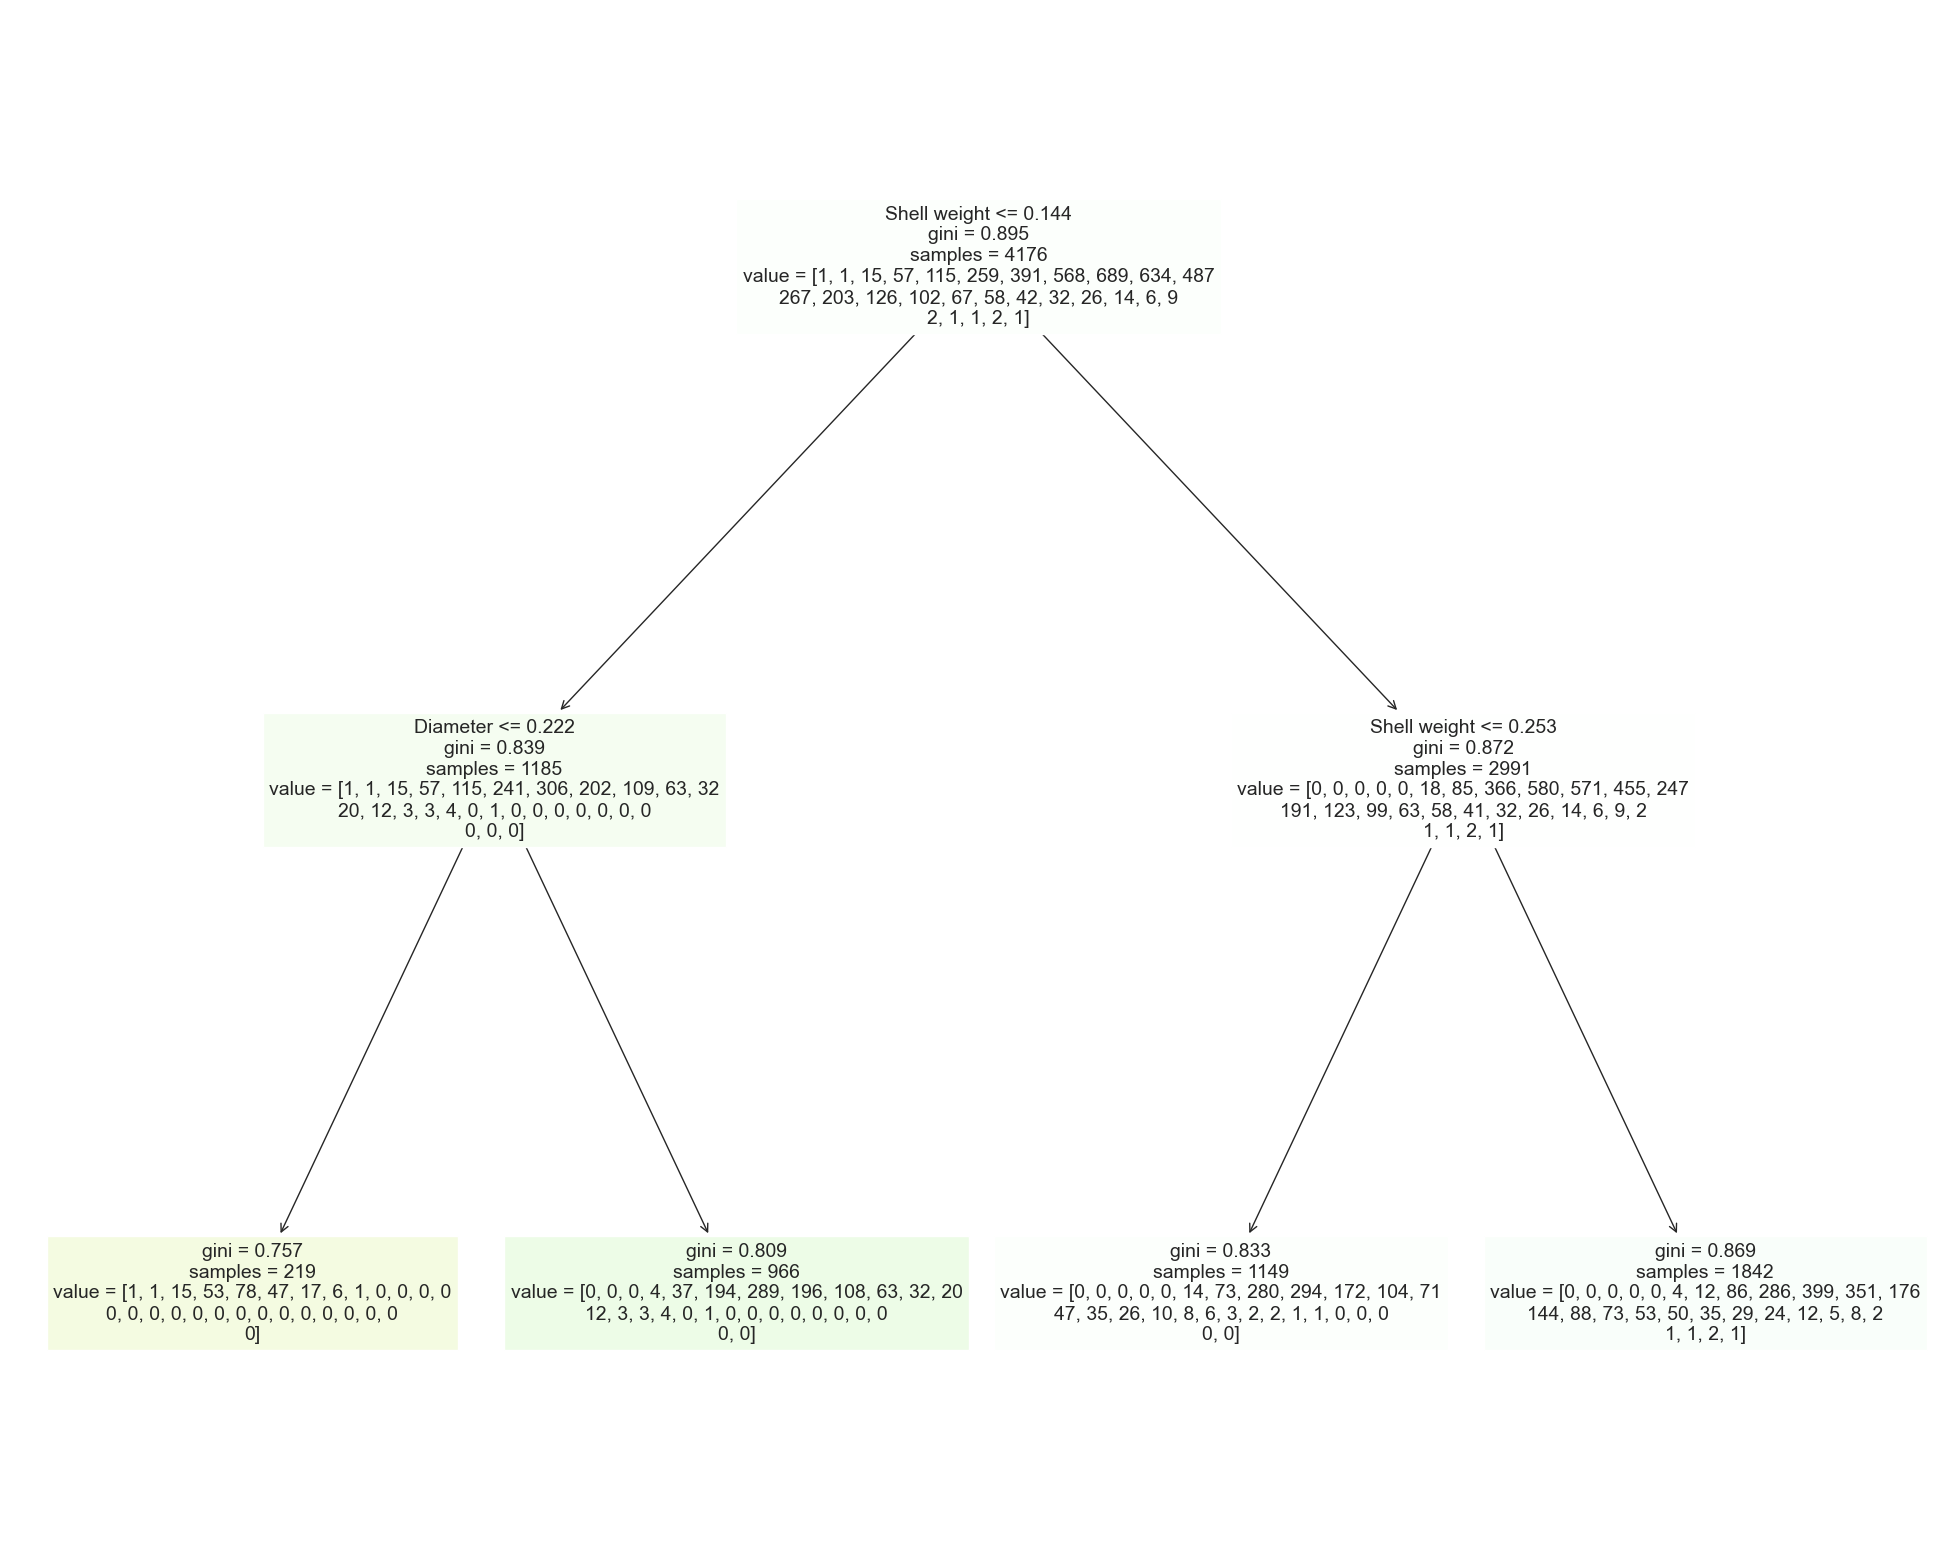

In [69]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt, 
                   feature_names=Xcolnames,  
                   
                   filled=True)

In [70]:
np.unique(Y)

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

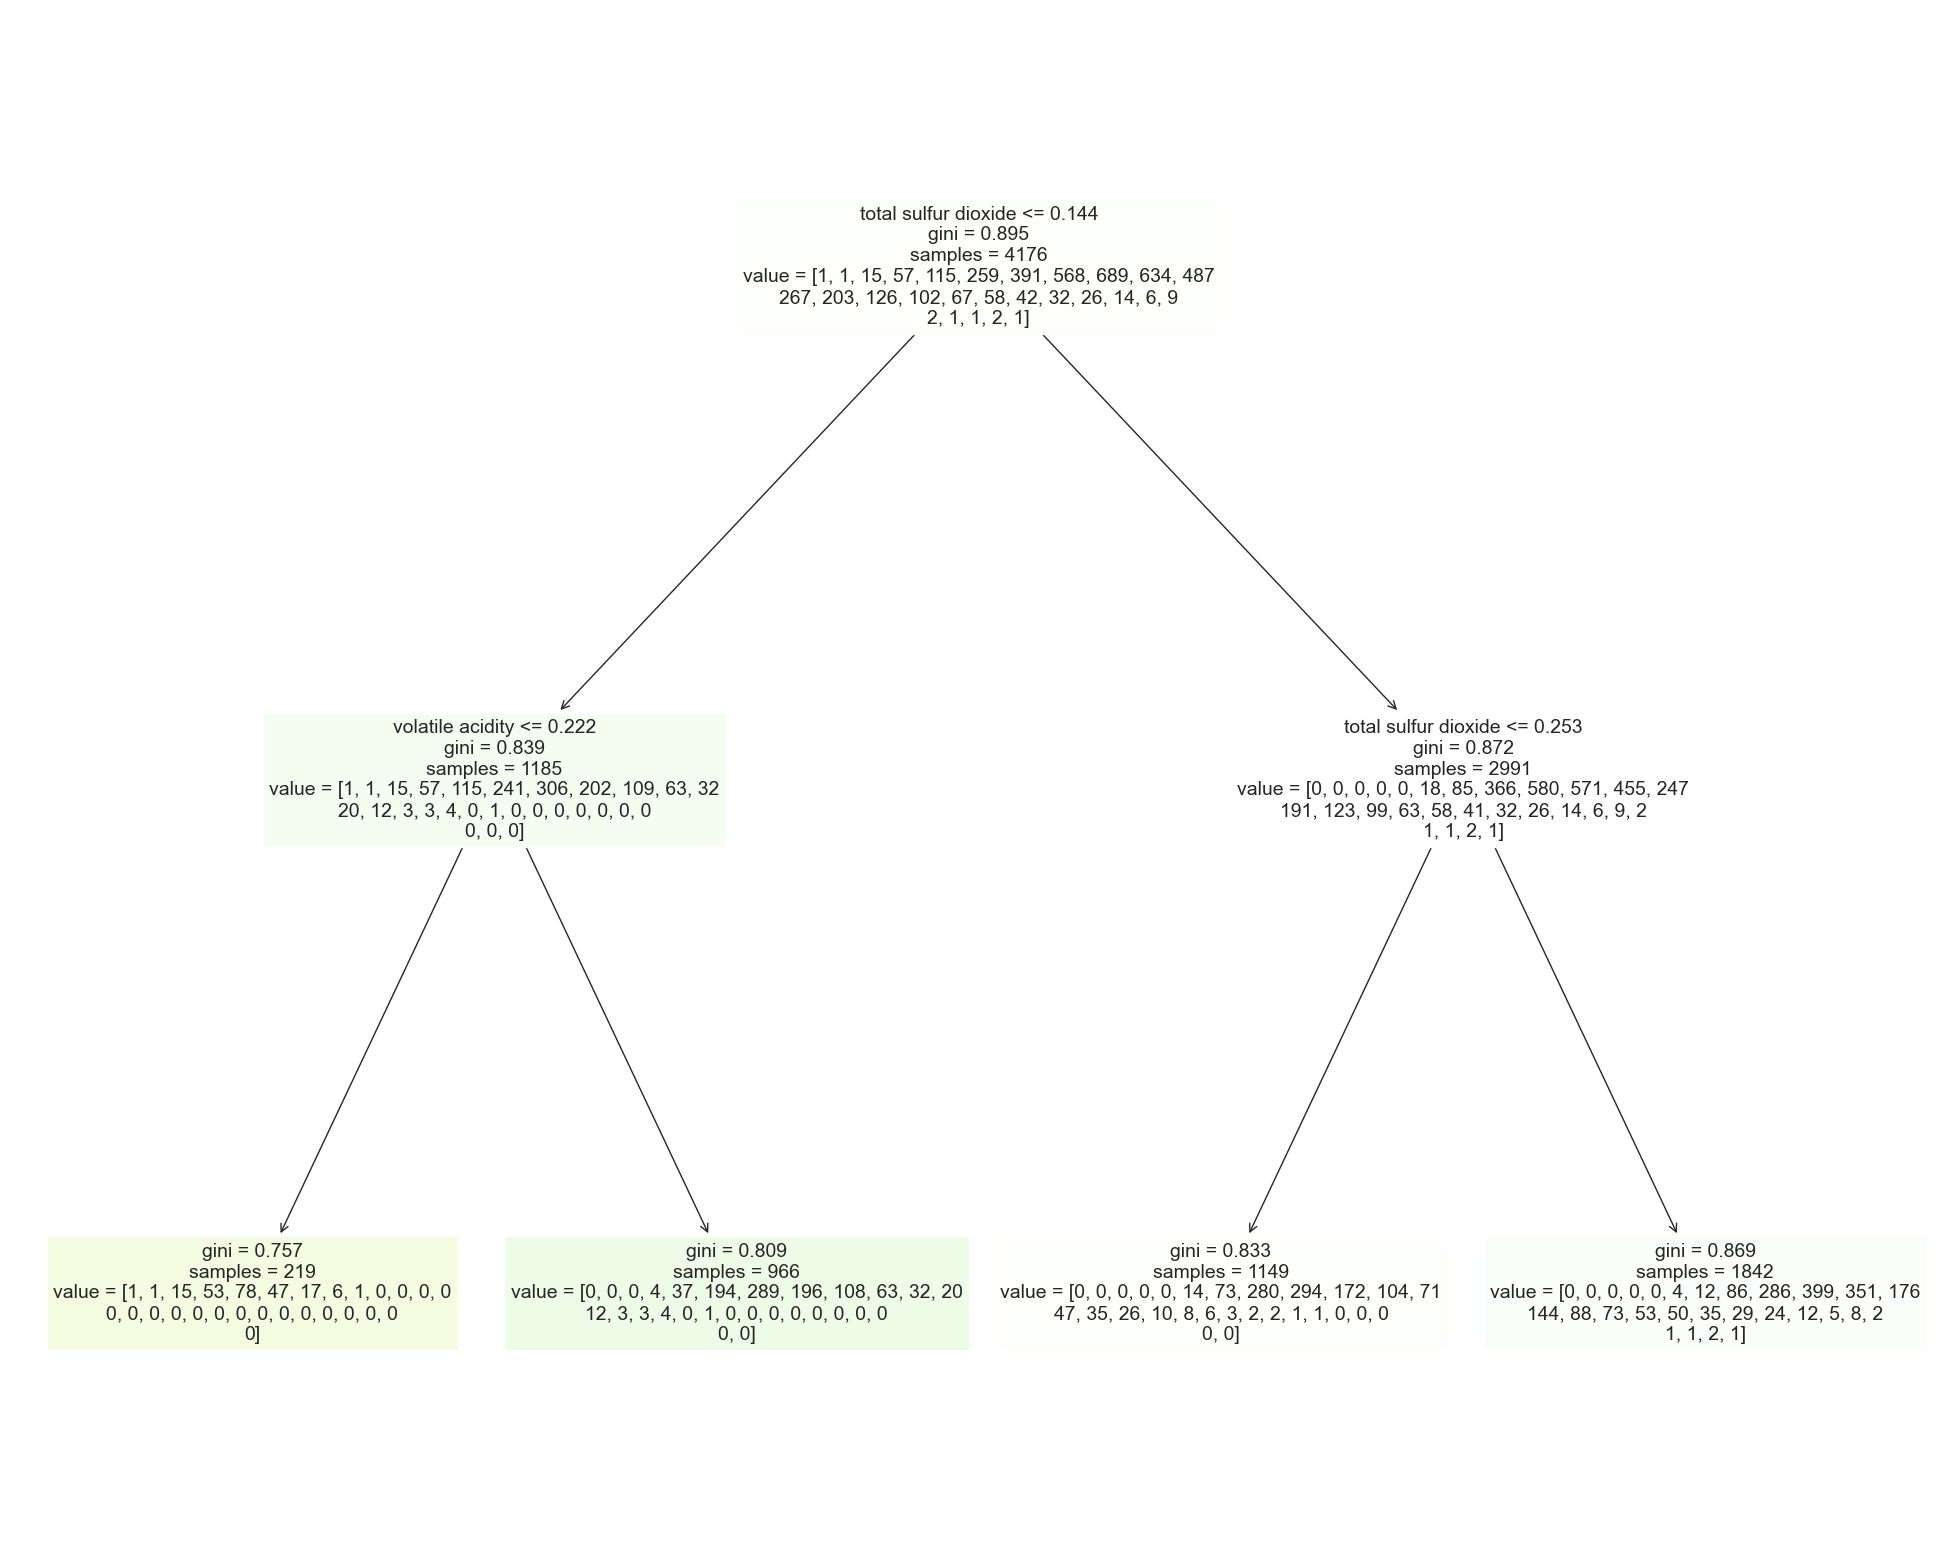

In [71]:
clf_dt_wine = DecisionTreeClassifier(max_depth=2)
model = clf_dt_wine.fit(X, Y)
tree_wine = tree.export_text(clf_dt_wine)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt, 
                   feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour'],  
                   #class_names=Ycolname,
                   filled=True)

## Random Forest Classifier

Best hyperparameters for Abalone dataset is {'max_depth': 5, 'n_estimators': 100}
Accuracy score for the best parameter is 0.27084491304472397
Best runtime for Abalone dataset is 0.34088802337646484


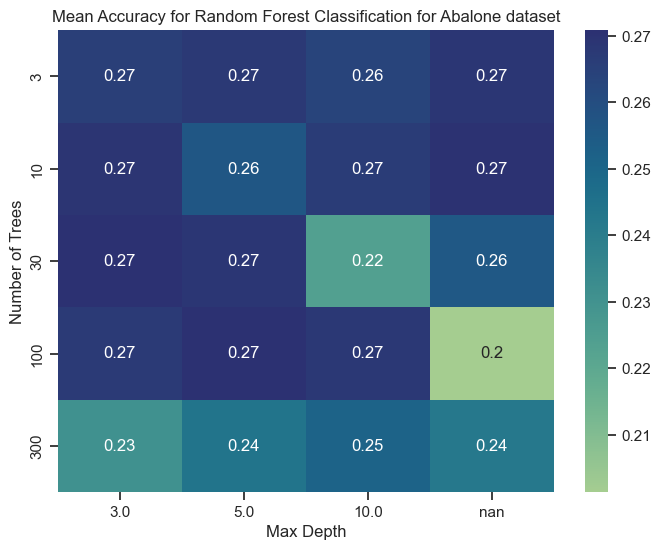

Best hyperparameters for Abalone PCA dataset is {'max_depth': 5, 'n_estimators': 300}
Accuracy score for the best parameter is 0.2650961235423889
Best runtime for Abalone PCA dataset is 1.5027592182159424


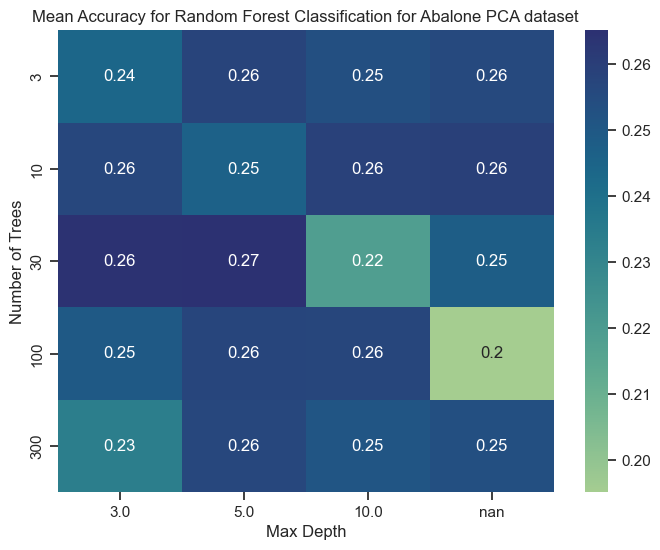

Best hyperparameters for Abalone LDA dataset is {'max_depth': 5, 'n_estimators': 30}
Accuracy score for the best parameter is 0.26126206916310923
Best runtime for Abalone LDA dataset is 0.1648392677307129


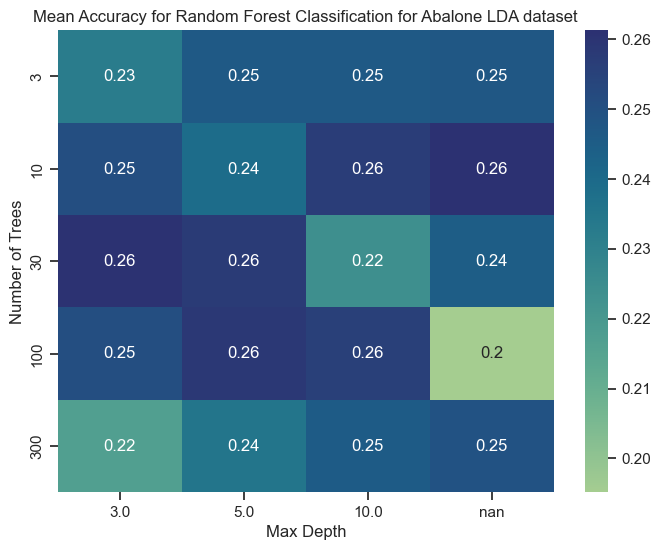

Best hyperparameters for Wine dataset is {'max_depth': 10, 'n_estimators': 30}
Accuracy score for the best parameter is 0.5119234914431219
Best runtime for Wine dataset is 0.22169089317321777


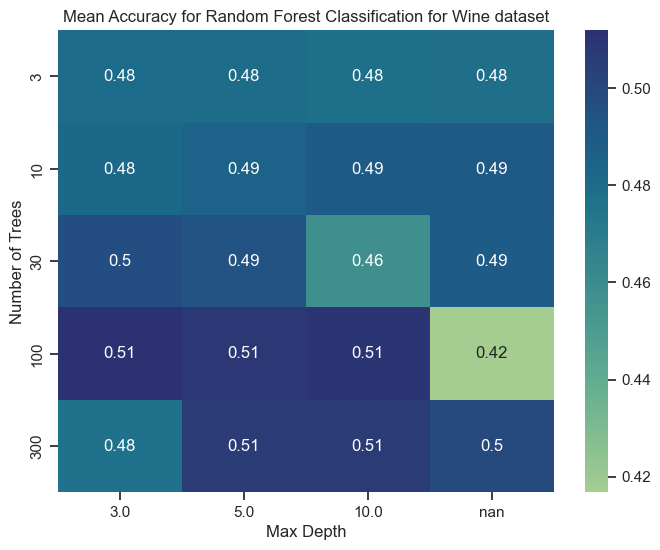

Best hyperparameters for Wine PCA dataset is {'max_depth': None, 'n_estimators': 300}
Accuracy score for the best parameter is 0.5065374548469237
Best runtime for Wine PCA dataset is 4.854037284851074


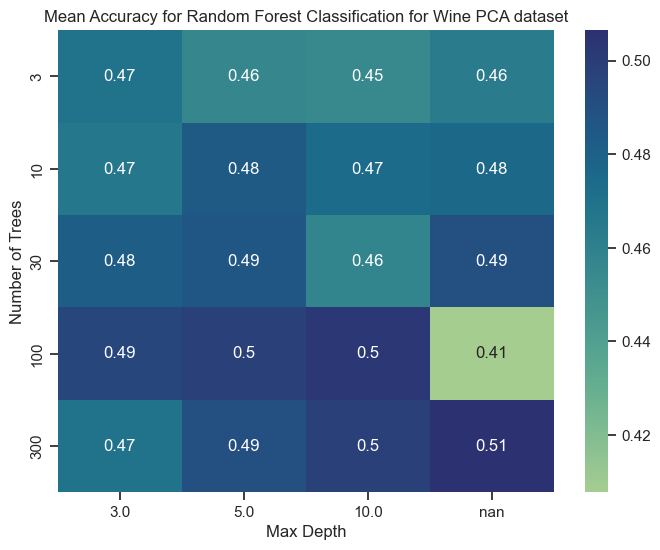

Best hyperparameters for Wine LDA dataset is {'max_depth': 5, 'n_estimators': 10}
Accuracy score for the best parameter is 0.5436432758926986
Best runtime for Wine LDA dataset is 0.058649301528930664


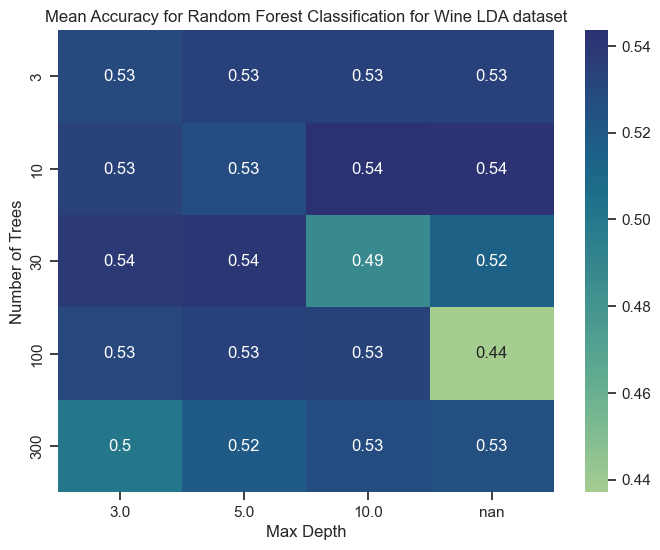

In [72]:
def run_cross_val_on_randomtrees(x, y, dataset):

    rf = RandomForestClassifier(random_state = 33)
    
    param_grid = {
        'max_depth': [3, 5, 10, None],
        'n_estimators': [3, 10, 30, 100, 300]
      }
    
    clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
    clf.fit(x, y)
    
    print(f'Best hyperparameters for {dataset} dataset is {clf.best_params_}')
    print(f'Accuracy score for the best parameter is {clf.best_score_}')
    print(f'Best runtime for {dataset} dataset is {clf.refit_time_}')
    
    
    score_df = pd.DataFrame(clf.cv_results_['mean_test_score'].reshape(len(param_grid['n_estimators']), len(param_grid['max_depth'])),
                         index=param_grid['n_estimators'],
                         columns=param_grid['max_depth'])

    ##Heat map of mean accuracy for each combination of parameters
    plt.figure(figsize=(8, 6))
    plt.title(f'Mean Accuracy for Random Forest Classification for {dataset} dataset')
    sns.heatmap(score_df, annot=True, cmap='crest')
    plt.xlabel('Max Depth')
    plt.ylabel('Number of Trees')
    plt.show()
    

##Random Forest Classification
#Abalone
run_cross_val_on_randomtrees(X_ab, Y_ab, "Abalone")
#Abalone PCA
run_cross_val_on_randomtrees(principal_ab_Df, Y_ab, "Abalone PCA")
#Abalone LDA
run_cross_val_on_randomtrees(lda_ab_Df, Y_ab, "Abalone LDA")
#Wine
run_cross_val_on_randomtrees(X, Y, "Wine")
#Wine PCA
run_cross_val_on_randomtrees(principal_wine_Df, Y, "Wine PCA")
#Wine LDA
run_cross_val_on_randomtrees(lda_wine_Df, Y, "Wine LDA")


### Gradient Tree Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'max_depth':[3,5,10, None],'n_estimators':[10,20,100], 'learning_rate':[0.1,0.3,0.5]}
model = GradientBoostingClassifier()

clf7 = GridSearchCV(model, parameters, n_jobs=4)
clf7.fit(X=principal_wine_Df, y=Y)
print('Best grid search hyperparameters for PCA Wine dataset are: '+str(clf7.best_params_))

Best grid search hyperparameters for PCA Wine dataset are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [74]:
print('Best accuracy for PCA Wine dataset is: ',clf7.best_score_)
print('Best runtime for PCA Wine dataset is: ',clf7.refit_time_)

Best accuracy for PCA Wine dataset is:  0.5057710665008587
Best runtime for PCA Wine dataset is:  16.970812559127808


In [75]:
model = GradientBoostingClassifier()

clf8 = GridSearchCV(model, parameters, n_jobs=4)
clf8.fit(X=lda_wine_Df, y=Y)
print('Best grid search hyperparameters for LDA Wine dataset are: '+str(clf8.best_params_))

Best grid search hyperparameters for LDA Wine dataset are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}


In [76]:
print('Best accuracy for LDA Wine dataset is: ',clf8.best_score_)
print('Best runtime for LDA Wine dataset is: ',clf8.refit_time_)

Best accuracy for LDA Wine dataset is:  0.5225561674660982
Best runtime for LDA Wine dataset is:  0.8771069049835205


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
model = GradientBoostingClassifier()
parameters = {'max_depth':[3,5,10, None],'n_estimators':[10,20,100], 'learning_rate':[0.1,0.3,0.5]}

clf9 = GridSearchCV(model, parameters, n_jobs=4)
clf9.fit(X=X, y=Y)
print('Best grid search hyperparameters for Wine dataset are: '+str(clf9.best_params_))

Best grid search hyperparameters for Wine dataset are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [78]:
print('Best accuracy for Wine dataset is: ',clf9.best_score_)
print('Best runtime for Wine dataset is: ',clf9.refit_time_)

Best accuracy for Wine dataset is:  0.5054627820216735
Best runtime for Wine dataset is:  9.976036548614502


In [79]:
model = GradientBoostingClassifier()

clf10 = GridSearchCV(model, parameters, n_jobs=4)
clf10.fit(X=principal_ab_Df, y=Y_ab)
print('Best grid search hyperparameters for PCA Abalone dataset are: '+str(clf10.best_params_))

Best grid search hyperparameters for PCA Abalone dataset are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}


In [80]:
print('Best accuracy for PCA Abalone dataset is: ',clf10.best_score_)
print('Best runtime for PCA Abalone dataset is: ',clf10.refit_time_)

Best accuracy for PCA Abalone dataset is:  0.25144801306477954
Best runtime for PCA Abalone dataset is:  5.8212926387786865


In [81]:
model = GradientBoostingClassifier()

clf11 = GridSearchCV(model, parameters, n_jobs=4)
clf11.fit(X=lda_ab_Df, y=Y_ab)
print('Best grid search hyperparameters for LDA Abalone dataset are: '+str(clf11.best_params_))

Best grid search hyperparameters for LDA Abalone dataset are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}


In [82]:
print('Best accuracy for LDA Abalone dataset is: ',clf11.best_score_)
print('Best runtime for LDA Abalone dataset is: ',clf11.refit_time_)

Best accuracy for LDA Abalone dataset is:  0.2524046643554995
Best runtime for LDA Abalone dataset is:  2.366055488586426


In [83]:
model = GradientBoostingClassifier()

clf12 = GridSearchCV(model, parameters, n_jobs=4)
clf12.fit(X=X_ab, y=Y_ab)
print('Best grid search hyperparameters for Abalone dataset are: '+str(clf12.best_params_))

Best grid search hyperparameters for Abalone dataset are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}


In [84]:
print('Best accuracy for Abalone dataset is: ',clf12.best_score_)
print('Best runtime for Abalone dataset is: ',clf12.refit_time_)

Best accuracy for Abalone dataset is:  0.263423487952325
Best runtime for Abalone dataset is:  1.4020214080810547


In [85]:
clf12.cv_results_['mean_test_score']

array([0.26342349, 0.26246397, 0.25456035, 0.249535  , 0.24689626,
       0.22989313, 0.22271094, 0.23228977, 0.229176  , 0.19373148,
       0.19349168, 0.19277311, 0.24952927, 0.24641549, 0.20426783,
       0.2246294 , 0.2179211 , 0.22199066, 0.20427384, 0.21169155,
       0.21887345, 0.19205942, 0.19038249, 0.19253646, 0.20023837,
       0.18874137, 0.0713612 , 0.20905968, 0.21193364, 0.15324814,
       0.19972266, 0.20738361, 0.21337048, 0.18607054, 0.18128155,
       0.18080108])

### Adaboost

In [86]:
def run_cross_validation_on_adaboost(x, y, dataset):

    ada = AdaBoostClassifier()
    param_grid = {'n_estimators': [3, 10, 30, 100, 300], 'learning_rate':[.001,0.01,.1]}

    clf13 = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5, scoring = 'accuracy')
    clf13.fit(x,y)

    print(f'Best hyperparameters for {dataset} dataset is {clf13.best_params_}')
    print(f'Accuracy score for the best parameter is {clf13.best_score_}')
    print(f'Best runtime for {dataset} dataset is {clf13.refit_time_}')
    

In [87]:
#Abalone
run_cross_validation_on_adaboost(X_ab, Y_ab, "Abalone")

Best hyperparameters for Abalone dataset is {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy score for the best parameter is 0.23851044322837578
Best runtime for Abalone dataset is 0.4160909652709961


In [88]:
#Abalone PCA
run_cross_validation_on_adaboost(principal_ab_Df, Y_ab, "Abalone PCA")

Best hyperparameters for Abalone PCA dataset is {'learning_rate': 0.001, 'n_estimators': 100}
Accuracy score for the best parameter is 0.21169125863106322
Best runtime for Abalone PCA dataset is 0.6218230724334717


In [89]:
#Abalone LDA
run_cross_validation_on_adaboost(lda_ab_Df, Y_ab, "Abalone LDA")

Best hyperparameters for Abalone LDA dataset is {'learning_rate': 0.001, 'n_estimators': 300}
Accuracy score for the best parameter is 0.2241403317766381
Best runtime for Abalone LDA dataset is 1.8653850555419922


In [90]:
#Wine
run_cross_validation_on_adaboost(X, Y, "Wine")

Best hyperparameters for Wine dataset is {'learning_rate': 0.001, 'n_estimators': 100}
Accuracy score for the best parameter is 0.4928561615443833
Best runtime for Wine dataset is 0.4590907096862793


In [91]:
#Wine PCA
run_cross_validation_on_adaboost(principal_wine_Df, Y, "Wine PCA")

Best hyperparameters for Wine PCA dataset is {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy score for the best parameter is 0.44620654941671106
Best runtime for Wine PCA dataset is 0.9053442478179932


In [92]:
#Wine LDA
run_cross_validation_on_adaboost(lda_wine_Df, Y, "Wine LDA")

Best hyperparameters for Wine LDA dataset is {'learning_rate': 0.01, 'n_estimators': 3}
Accuracy score for the best parameter is 0.5344077692899865
Best runtime for Wine LDA dataset is 0.017072677612304688


### XGBoost

In [93]:
from xgboost import XGBClassifier

In [94]:
def run_cross_validation_on_XGBoost(x, y, dataset):

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    xgb = XGBClassifier(nthread=4,seed=42)
    param_grid = {'n_estimators': [3, 10, 30, 100], 'learning_rate':[.001,0.01,.1], 'max_depth' : [3, 5, 10, None]}

    clf14 = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5, scoring = 'accuracy')
    clf14.fit(x,y)

    print(f'Best hyperparameters for {dataset} dataset is {clf14.best_params_}')
    print(f'Accuracy score for the best parameter is {clf14.best_score_}')
    print(f'Best runtime for {dataset} dataset is {clf14.refit_time_}')
    #print(f'Best estimator for {dataset} dataset is {clf14.best_estimator_}')

In [95]:
#Abalone
run_cross_validation_on_XGBoost(X_ab, Y_ab, "Abalone")

Best hyperparameters for Abalone dataset is {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 3}
Accuracy score for the best parameter is nan
Best runtime for Abalone dataset is 0.04531073570251465


In [96]:
#Abalone PCA
run_cross_validation_on_XGBoost(principal_ab_Df, Y_ab, "Abalone PCA")

Best hyperparameters for Abalone PCA dataset is {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 3}
Accuracy score for the best parameter is nan
Best runtime for Abalone PCA dataset is 0.08155345916748047


In [97]:
#Abalone LDA
run_cross_validation_on_XGBoost(lda_ab_Df, Y_ab, "Abalone LDA")

Best hyperparameters for Abalone LDA dataset is {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 3}
Accuracy score for the best parameter is nan
Best runtime for Abalone LDA dataset is 0.08148765563964844


In [98]:
#Wine
run_cross_validation_on_XGBoost(X, Y, "Wine")

Best hyperparameters for Wine dataset is {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy score for the best parameter is 0.5159292947237519
Best runtime for Wine dataset is 0.45503902435302734


In [99]:
#Wine PCA
run_cross_validation_on_XGBoost(principal_wine_Df, Y, "Wine PCA")

Best hyperparameters for Wine PCA dataset is {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy score for the best parameter is 0.5102362764256528
Best runtime for Wine PCA dataset is 1.2111577987670898


In [100]:
#Wine LDA
run_cross_validation_on_XGBoost(lda_wine_Df, Y, "Wine LDA")

Best hyperparameters for Wine LDA dataset is {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy score for the best parameter is 0.5402578314679931
Best runtime for Wine LDA dataset is 0.7725775241851807
